# Introduction to Machine Learning in python for Invironmental problems 


                                                     
 
## Lecture_2: Supervised Learning Algorithms 
                                                     
- This module uses basic ML models – linear regression, logistic regression, decision trees, random forests, and gradient-boosted trees – to predict future rotation in numerically simulated thunderstorms.  


AMS-Conference-2020 

## Supervised Machine Learning 


<img src="SML.png" alt="Decision-tree schematic" width="1000" /> 





## Supervised Machine Learning Categories:

<img src="SupervisedML.png" alt="Decision-tree schematic" width="1000" /> 

## Supervised Classification Machine Learning Models: 
<img src="Models.png" alt="Decision-tree schematic" width="1000" /> 

# Logistic Regression Classifier
<img src="LR.png" alt="Decision-tree schematic" width="1000" /> 

- Logistic regression is basically linear regression with targets y = (0, 1).i.e. binary classification.
- Logistic regression is a linear regression with different decision rule, which is hyperplane. 
- Logistic regression learns the conditional probability distribution $P(y|x)$ 
- if the estimated probablity is greater than 50%, then the model predicts that instances belongs to htat class (label 1), if not class label 0. 

## Logistic regression is a discriminative classifiers 
- For training X, and y as label, logistic regression learn $P(y|X)$. 
- For $\beta$ as adjustable parameters, and two classes $y=o$ and $y=1$: 
<br>
$P_{1}(X; \beta) = \frac{1}{1+\exp(-\beta x)}$  and  $P_{0}(X; \beta) = 1 - \frac{1}{1+\exp(-\beta x)}$
- This is equivalent to: 
<br>
$log \frac{P_{1}(X; \beta)}{P_{0}(X; \beta)} = \beta X$
- Recall the equation for linear regression, the equation for logistic regression would be: 
<br>
$\textrm{ln}(\frac{P_{1}(X; \beta)}{1 - P_{1}(X; \beta)}) = \beta_0 + \sum\limits_{j = 1}^{M} \beta_j x_j$
<br>
$P(X; \beta) = \frac{\textrm{exp}(\beta_0 + \sum\limits_{j = 1}^{M} \beta_j x_j)}{1 + \textrm{exp}(\beta_0 + \sum\limits_{j = 1}^{M} \beta_j x_j)} $

## Constructing a learning algorithm for logistic regression
- The coefficients ($\beta$) of the logistic regression algorithm must be estimated through training process.
- The conditional data likelihood is the probability of the label (y) values in the training data, conditioned on thier corresponing X values. So, the log of the conditional likelihood: 
<br>
$\beta = arg max \sum_{j} \textrm{ln} P (y_{j} | X_{j}, \beta)$ 
<br>

- This conditional data log lokelihood, which can be rewritten as: 
<br>
$l(\beta) = -\frac{1}{N} \sum\limits_{i = 1}^{N} \left[ y_i\textrm{ln}P(y_i = 1 | X_i, \beta) + (1 - y_i)\textrm{ln}P(y_i = 0 | X_i, \beta) \right]$
<br>
<br>
$\color{blue}{P(y_i =1 | X_i, \beta)}$ = forecast probability for $i^{\textrm{th}}$ example.  This is probability that the event occurs (so class = 1 or "yes").  In our case, this is probability that max future vorticity $\color{red}{\ge 3.850 \times 10^{-3}\textrm{s}^{-1}}$.
<br>
$\color{blue}{y_i}$ = true label for $i^{\textrm{th}}$ example (0 or 1); 
<br>
$\color{blue}{N}$ = number of training examples; 
<br>
$\color{blue}{l(\beta)}$ = cross-entropy

# Setup

To use this notebook, you will need Python 3.6 and the following packages.

 - scipy
 - pyproj
 - scikit-learn
 - matplotlib
If you have Anaconda on a Linux or Mac, you can install these packages with the commands `pip install scipy`, `pip install tensorflow`, etc.

# Imports

The next cell imports all libraries that will be used by this notebook.  If the notebook crashes anywhere, it will probably be here.

In [1]:
%matplotlib inline
import copy
import warnings
import numpy
import matplotlib.pyplot as pyplot
import utils
import roc_curves
import attr_diagrams  


warnings.filterwarnings('ignore')
DEFAULT_FEATURE_DIR_NAME = ('./data/track_data_ncar_ams_3km_csv_small')
SEPARATOR_STRING = '\n\n' + '*' * 50 + '\n\n'
MINOR_SEPARATOR_STRING = '\n\n' + '-' * 50 + '\n\n'

MODULE2_DIR_NAME = '.'
SHORT_COURSE_DIR_NAME = '..'

### Prevent Auto-scrolling
The next cell prevents output in the notebook from being nested in a scroll box (the scroll box is small and makes things hard to see).

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Find input data

Find the input data based on their directory, and categorized them based on training (2010-2014), validation (2015) and testing (2016-2017) periods. 

In [3]:
training_file_names = utils.find_many_feature_files(
    first_date_string='20100101', last_date_string='20141231', feature_dir_name=DEFAULT_FEATURE_DIR_NAME)

validation_file_names = utils.find_many_feature_files(
    first_date_string='20150101', last_date_string='20151231', feature_dir_name=DEFAULT_FEATURE_DIR_NAME)

testing_file_names = utils.find_many_feature_files(
    first_date_string='20160101', last_date_string='20171231', feature_dir_name=DEFAULT_FEATURE_DIR_NAME)

### Read Data

Next step is reading the data, and explore the contents of the files. 

In [4]:
(training_metadata_table, training_predictor_table_denorm,
 training_target_table
) = utils.read_many_feature_files(training_file_names)
print(MINOR_SEPARATOR_STRING)

(validation_metadata_table, validation_predictor_table_denorm,
 validation_target_table
) = utils.read_many_feature_files(validation_file_names)
print(MINOR_SEPARATOR_STRING)

(testing_metadata_table, testing_predictor_table_denorm,
 testing_target_table
) = utils.read_many_feature_files(testing_file_names)
print(MINOR_SEPARATOR_STRING)

print('Variables in metadata are as follows:\n{0:s}'.format(
    str(list(training_metadata_table))
))

print('\nPredictor variables are as follows:\n{0:s}'.format(
    str(list(training_predictor_table_denorm))
))

print('\nTarget variable is as follows:\n{0:s}'.format(
    str(list(training_target_table))
))

first_predictor_name = list(training_predictor_table_denorm)[0]
these_predictor_values = (
    training_predictor_table_denorm[first_predictor_name].values[:10]
)

message_string = (
    '\nValues of predictor variable "{0:s}" for the first training '
    'examples:\n{1:s}'
).format(first_predictor_name, str(these_predictor_values))
print(message_string)

target_name = list(training_target_table)[0]
these_target_values = training_target_table[target_name].values[:10]

message_string = (
    '\nValues of target variable for the first training examples:\n{0:s}'
).format(str(these_target_values))
print(message_string)


Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20101024-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20101122-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20110201-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20110308-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20110326-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20110404-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20110414-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20110420-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20110425-0000.csv"...
Reading data from: "./data/t

Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20150706-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20150712-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20151031-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20151227-0000.csv"...


--------------------------------------------------


Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20160224-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20160323-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20160401-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20160415-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM

In [5]:
training_predictor_table_denorm.head(5)

,REFL_COM_mean,REFL_COM_max,REFL_COM_min,REFL_COM_std,REFL_COM_percentile_10,REFL_COM_percentile_25,REFL_COM_percentile_50,REFL_COM_percentile_75,REFL_COM_percentile_90,U10_mean,...,T2_percentile_10,T2_percentile_25,T2_percentile_50,T2_percentile_75,T2_percentile_90,area,eccentricity,major_axis_length,minor_axis_length,orientation
0,42.71822,43.67072,40.97010,0.96199,41.41314,41.91508,42.97249,43.62384,43.63801,0.19710,...,293.05662,293.12073,293.17340,293.20276,293.21045,9,0.78628,4.27766,2.64302,-0.10555
1,47.09285,54.19151,40.63351,3.34380,43.27050,44.62197,46.86275,49.64786,51.59267,-1.03154,...,291.81573,291.87878,291.98325,292.14569,292.21041,35,0.47108,7.07588,6.24158,-1.33266
2,45.53852,48.22308,40.77723,1.97809,42.59812,44.32117,45.83910,47.22936,47.66140,-0.21393,...,292.61641,292.71604,293.00183,293.26897,293.48459,36,0.87636,9.90123,4.76900,-0.10405
3,44.30976,47.98366,41.44846,1.61085,42.41405,43.40802,43.90155,45.34798,46.96363,1.27862,...,292.12880,292.26558,292.66022,292.91397,293.20261,39,0.97896,16.76704,3.42129,-0.71430
4,44.64383,50.23818,41.77694,2.45656,42.25287,42.95226,43.55742,45.76885,48.53609,0.88129,...,292.13662,292.20366,292.27325,292.39474,292.60328,23,0.94226,9.77854,3.27479,-0.91437


In [6]:
training_target_table.head(5)

,RVORT1_MAX-future_max
0,0.00035
1,0.00195
2,0.00241
3,0.00233
4,0.00254


### Normalization

When you have multiple predictor variables on different scales, they should be normalized.
This ensures that the model does not ignore variables with smaller scales.
For example, if a model is trained with temperature in Kelvins and specific humidity in kg kg$^{-1}$, it will probably learn to emphasize temperature (which varies from $\sim$180-330 K) and ignore specific humidity (which varies from $\sim$0-0.02 kg kg$^{-1}$).

**The sklearn.preprocessing package provide several common utility functions to standardize the raw input predctors:**

\url(https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py).


*   **MinMaxScaler**: 

Scaling features to lie between a given minimum and maximum value, often between zero and one.

*   **MaxAbsScaler**:

scaling features to in a way that the maximum absolute value of each feature is scaled to unit size. The motivation to use the scaling normalization methds is being rebust to very small standard deviations of features and preserving zero entires in sparse data. 
*   **StandardScaler**:

implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.
*   **RobustScaler**:

If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use robust_scale and RobustScaler as drop-in replacements instead. They use more robust estimates for the center and range of your data.
*   **Normalizer**:

Normalization is the process of scaling individual samples to have unit norm. 
*   **QuantileTransformer**:

Two types of transformations are available: quantile transforms and power transforms. Both quantile and power transforms are based on monotonic transformations of the features and thus preserve the rank of the values along each feature. a quantile transform smooths out unusual distributions and is less influenced by outliers than scaling methods. It does, however, distort correlations and distances within and across features.
*   **PowerTransformer**:

Power transforms are a family of parametric transformations that aim to map data from any distribution to as close to a Gaussian distribution.


**Each predictor variable is transformed independently to sclaed data, using the mean and standard deviation from the training data. Validation and testing data should also be normalized, but using the means and standard deviations from the training data.**

In [7]:
training_predictor_table, validation_predictor_table, testing_predictor_table = utils.norm_predictors(
    training_predictor_table_denorm,validation_predictor_table_denorm, testing_predictor_table_denorm, "StandardScaler")

predictor_names = list(training_predictor_table_denorm)

original_values = (
    'Original values of "{0:s}" for the first training examples:\n{1:s}'
).format(predictor_names[0], str(training_predictor_table_denorm[predictor_names[0]].values[:10]))
print(original_values) 

normalized_values = (
    '\nNormalized values of "{0:s}" for the first training examples:\n{1:s}'
).format(predictor_names[0], str(training_predictor_table[predictor_names[0]].values[:10]))
print(normalized_values)

Original values of "REFL_COM_mean" for the first training examples:
[42.71822 47.09285 45.53852 44.30976 44.64383 44.33831 45.73259 43.69113
 45.3804  47.31104]

Normalized values of "REFL_COM_mean" for the first training examples:
[-1.03620187  0.06183004 -0.32830671 -0.63672541 -0.55287385 -0.62955936
 -0.27959515 -0.79200151 -0.36799482  0.11659572]


In [8]:
binarization_threshold = utils.get_binarization_threshold(
    csv_file_names=training_file_names, percentile_level=90.)
print(MINOR_SEPARATOR_STRING)

these_target_values = (
    training_target_table[utils.TARGET_NAME].values[:10]
)

message_string = (
    'Real-numbered target values for the first training examples:\n{0:s}'
).format(str(these_target_values))
print(message_string)

training_target_values = utils.binarize_target_values(
    target_values=training_target_table[utils.TARGET_NAME].values,
    binarization_threshold=binarization_threshold)

training_target_table = training_target_table.assign(
    **{utils.BINARIZED_TARGET_NAME: training_target_values}
)

print('\nBinarization threshold = {0:.3e} s^-1'.format(
    binarization_threshold
))

these_target_values = (
    training_target_table[utils.TARGET_NAME].values[:10]
)

message_string = (
    '\nBinarized target values for the first training examples:\n{0:s}'
).format(str(training_target_table))
print(message_string)

validation_target_values = utils.binarize_target_values(
    target_values=validation_target_table[utils.TARGET_NAME].values,
    binarization_threshold=binarization_threshold)

validation_target_table = validation_target_table.assign(
    **{utils.BINARIZED_TARGET_NAME: validation_target_values}
)

testing_target_values = utils.binarize_target_values(
    target_values=testing_target_table[utils.TARGET_NAME].values,
    binarization_threshold=binarization_threshold)

testing_target_table = testing_target_table.assign(
    **{utils.BINARIZED_TARGET_NAME: testing_target_values}
)

Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20101024-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20101122-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20110201-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20110308-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20110326-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20110404-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20110414-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20110420-0000.csv"...
Reading data from: "./data/track_data_ncar_ams_3km_csv_small\track_step_NCARSTORM_d01_20110425-0000.csv"...
Reading data from: "./data/t

# Binary Classification

 - **The rest of this module focuses on binary classification, rather than regression.**
 - "Regression" is the prediction of a real number (*e.g.*, above, where we predicted max future vorticity).
 - "Classification" is the prediction of a category (*e.g.*, low, medium, or high max future vorticity).
<br><br>
 - **In binary classification there are two categories.**
 - Thus, prediction takes the form of answering a **yes-or-no question.**
 - We will use the same target variable (max future vorticity), except we will binarize it.
 - The problem will be predicting whether or not max future vorticity exceeds a threshold.

# Binarization

 - The next cell "binarizes" the target variable (turns each value into a 0 or 1, yes or no).
 - The threshold is the 90$^{\textrm{th}}$ percentile of max future vorticity over all training examples.
 - The same threshold is used to binarize training, validation, and testing data.

# Supervised learning in Sckit-learn 

All machine learning models share a common set of functions, making it very easy to try different models on your dataset(s): 
    There are three-four main functions: 
<img src="SK.png" alt="Decision-tree schematic" width="700" />

# setup a logistic regression model in python: 

- configuration of model: import the sckit learn library and linear model in python by: 
<br>
import sklearn.linear_model 
<br>
<br>
- Setup a logistic regression function by: 
<br>
reg = sklearn.linear_model.SGDClassifier(
            loss='log', penalty='none', fit_intercept=True, verbose=0,
            random_state=RANDOM_SEED)}
<br>
<br>
- Train the model by using the "fit" function:
<br>
reg.fit(xtrain, ytrain)}
<br>
<br>
- Test on new data by using "predict" function:
<br>
reg.predict(xest)

In [9]:
def setup_logistic_regression(lambda1=0., lambda2=0.):
    """Sets up (but does not train) logistic-regression model.
    :param lambda1: L1-regularization weight.
    :param lambda2: L2-regularization weight.
    :return: model_object: Instance of `sklearn.linear_model.SGDClassifier`.
    """

    assert lambda1 >= 0
    assert lambda2 >= 0

    if lambda1 < LAMBDA_TOLERANCE and lambda2 < LAMBDA_TOLERANCE:
        return sklearn.linear_model.SGDClassifier(
            loss='log', penalty='none', fit_intercept=True, verbose=0,
            random_state=RANDOM_SEED)

    if lambda1 < LAMBDA_TOLERANCE:
        return sklearn.linear_model.SGDClassifier(
            loss='log', penalty='l2', alpha=lambda2, fit_intercept=True,
            verbose=0, random_state=RANDOM_SEED)

    if lambda2 < LAMBDA_TOLERANCE:
        return sklearn.linear_model.SGDClassifier(
            loss='log', penalty='l1', alpha=lambda1, fit_intercept=True,
            verbose=0, random_state=RANDOM_SEED)

    alpha, l1_ratio = _lambdas_to_sklearn_inputs(
        lambda1=lambda1, lambda2=lambda2)

    return sklearn.linear_model.SGDClassifier(
        loss='log', penalty='elasticnet', alpha=alpha, l1_ratio=l1_ratio,
        fit_intercept=True, verbose=0, random_state=RANDOM_SEED)

# Logistic Regression: Example

 - Trains a logistic-regression model (with default hyperparameters) to predict the label for each storm (whether or not max future vorticity $\ge 3.850 \times 10^{-3}\textrm{ s}^{-1}$).
 - Evaluates the model on both training and validation data.


In [10]:
plain_log_model_object = utils.setup_logistic_regression(
    lambda1=0., lambda2=0.)

_ = utils.train_logistic_regression(
    model_object=plain_log_model_object,
    training_predictor_table=training_predictor_table,
    training_target_table=training_target_table)

training_probabilities = plain_log_model_object.predict_proba(
    training_predictor_table.as_matrix()
)[:, 1]
training_event_frequency = numpy.mean(
    training_target_table[utils.BINARIZED_TARGET_NAME].values
)

**For both training and validation data, the following graphics have been applied to evaluate the model:**

 - ROC (receiver operating characteristic) curve (Metz 1978)
 - Performance diagram (Roebber 2009)
 - Attributes diagram (Hsu and Murphy 1986)
 - Learning Curve (Yelle, Louis.E 1979)



# Contingency Table

**Most evaluation methods for binary classification are based on the contingency table** (or "confusion matrix"), shown below.

<img src="contingency_table.png" alt="Contingency table" width="500" />

 - $a$ = number of true positives (forecast = label = "yes")
 - $b$ = number of false positives (forecast = "yes" but label = "no")
 - $c$ = number of false negatives (forecast = "no" but label = "yes")
 - $d$ = number of true negatives (forecast = label = "no")

 - **Problem**: most classification models (including logistic regression) output probabilities, rather than yeses and nos.
 - **Solution**: determinize the probabilities.
 - "Determinize" is just a fancy way of saying "turn the probabilities into yeses and nos".
 - This is done with the following equation, where $p$ = probability; $p^*$ = threshold; and $\hat{y}$ is the resulting deterministic forecast. 
    
$\hat{y} = \begin{cases}1,\quad\textrm{if }p \ge p^* \\0,\quad\textrm{otherwise}\end{cases}$

 - The best threshold is usually **not** 0.5.
 - Keep in mind that $p^*$ is a hyperparameter, so it should be optimized on the validation data.


**The following scores can be computed from the contingency table.**

<img src="ct_scores.png" alt="Scores from contingency table" width="500" />

# ROC Curve
<img src="ROC.png" alt="Contingency table" width="700" />

# ROC Curve

- An ROC curve (Riceiver Operating Curve) is a graph showing the performance of a classification model at all classification - thresholds. 
- The curve plot two parameters, True Positive Rate which in our case would be POD and False Positive Rate which would be POFD as a probability of false detection. 


**Two numbers can be used to summarize the goodness of the ROC curve:**

 - Maximum Peirce score (POD - POFD) over all thresholds
 - Area under the curve (AUC)
 - Generally, an AUC $\ge$ 0.9 is considered "excellent".
 - AUC = 0.5 (dashed grey line) for a random model.

# Performance Diagram

 - The performance diagram plots POD (probability of detection) vs. success ratio (1 - FAR).
 - Again, each point corresponds to one $p^*$ value.
 - For $p^*$ = 0, POD = 1 and success ratio is minimized.
 - For $p^*$ = 1, POD = 0 and success ratio is maximized.

CSI (critical success index) and frequency bias are contoured in the background.  They can be expressed in POD&ndash;success-ratio space as follows.
<br><br>
$\textrm{bias} = \frac{\textrm{POD}}{\textrm{SR}}$
<br>
$\textrm{CSI}^{-1} = \textrm{POD}^{-1} + \textrm{SR}^{-1} - 1$


**A few numbers can be used to summarize the goodness of the performance diagram:**

 - Maximum CSI
 - Frequency bias at maximum CSI (should occur with a frequency bias near 1.0)
 - Area under curve
<br><br>
 - However, unlike the ROC curve, these numbers are very sensitive to the class distribution.
 - Thus, thresholds for "good" and "bad" depend on the class distribution.
 - For some rare events a max CSI of 0.10 may be excellent; for common events a max CSI of 0.8 may be poor.

# Attributes Diagram

 - The attributes diagram is a reliability curve for binary classification, plus a few reference lines in the background.
 - **Plots forecast probability vs. conditional mean frequency.**
 - This answers the question: **"given forecast probability $p$, how likely is the event?"**
<br><br>
 - **For perfect reliability, conditional event frequency = forecast probability always.**
 - This is represented by the diagonal grey line ($x = y$), called the "perfect-reliability line".
 - The vertical grey line is the "climatology line," representing the event frequency in the training data, which is just called "climatology".  Climatology in our case is 10%.  If the model always forecast climatology, the reliability curve would collapse to a single point on this line.
 - The horizontal grey line is the "no-resolution line," also based on training-set climatology.  If the model were completely random, the reliability curve would approx follow this line.


 - **The blue shading is the "positive-skill area," where Brier skill score $>$ 0.**
 - Brier skill score (BSS) is the Brier score (BS) relative to climatology.
<br><br>
$\textrm{BS} = \frac{1}{N} \sum\limits_{i = 1}^{N} (p_i - y_i)^2$
<br>
$\textrm{BSS} = \frac{\textrm{BS}_{\textrm{climo}} - \textrm{BS}}{\textrm{BS}_{\textrm{climo}}}$

Training Max Peirce score (POD - POFD) = 0.639
Training AUC (area under ROC curve) = 0.896
Training Max CSI (critical success index) = 0.375
Training Brier score = 0.064
Training Brier skill score (improvement over climatology) = 0.293


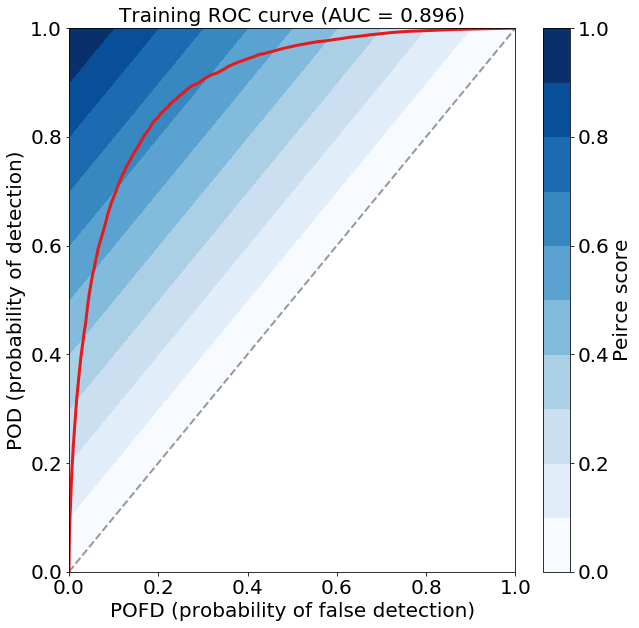

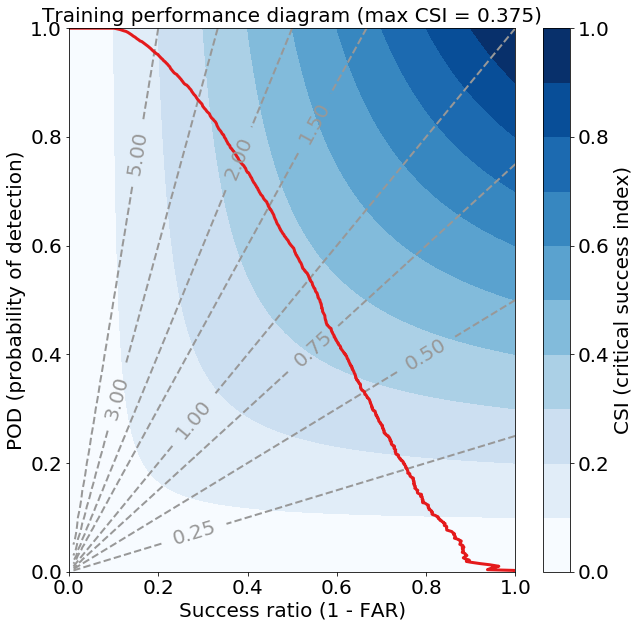

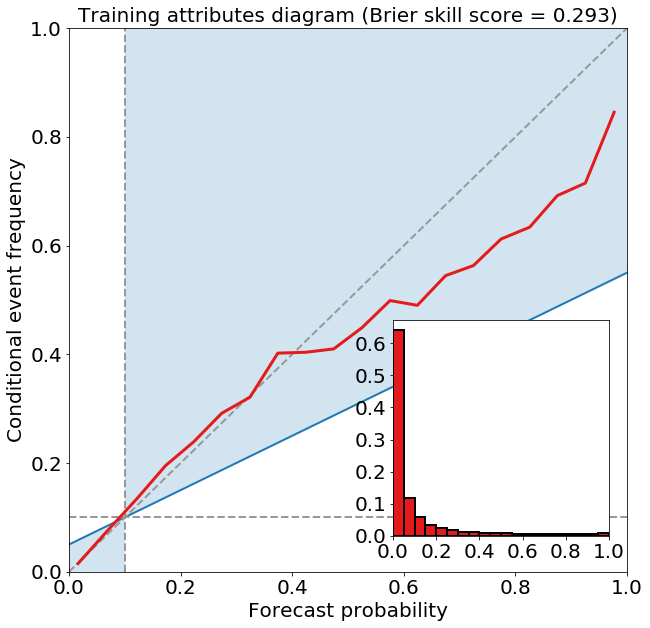

In [11]:
_ = utils.eval_binary_classifn(
    observed_labels=training_target_table[
        utils.BINARIZED_TARGET_NAME].values,
    forecast_probabilities=training_probabilities,
    training_event_frequency=training_event_frequency,
    dataset_name='training')


Validation Max Peirce score (POD - POFD) = 0.649
Validation AUC (area under ROC curve) = 0.902
Validation Max CSI (critical success index) = 0.382
Validation Brier score = 0.063
Validation Brier skill score (improvement over climatology) = 0.307


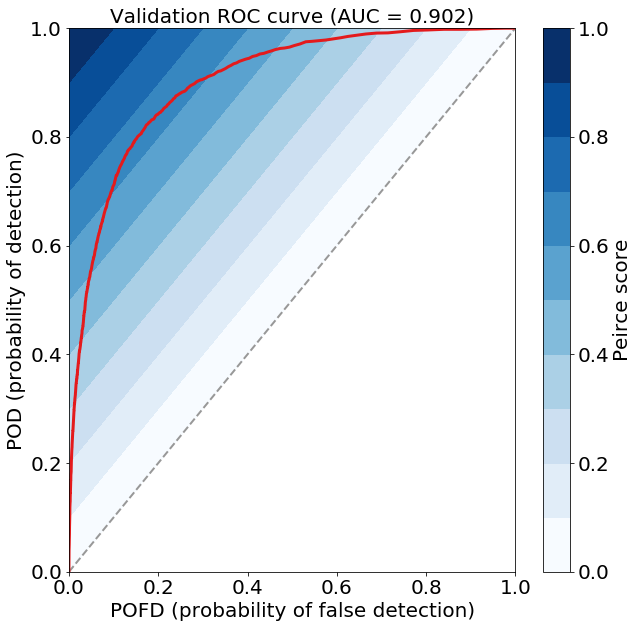

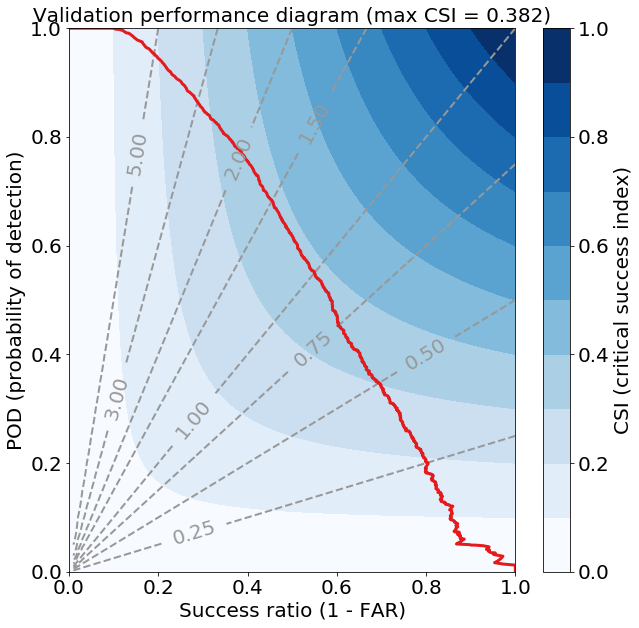

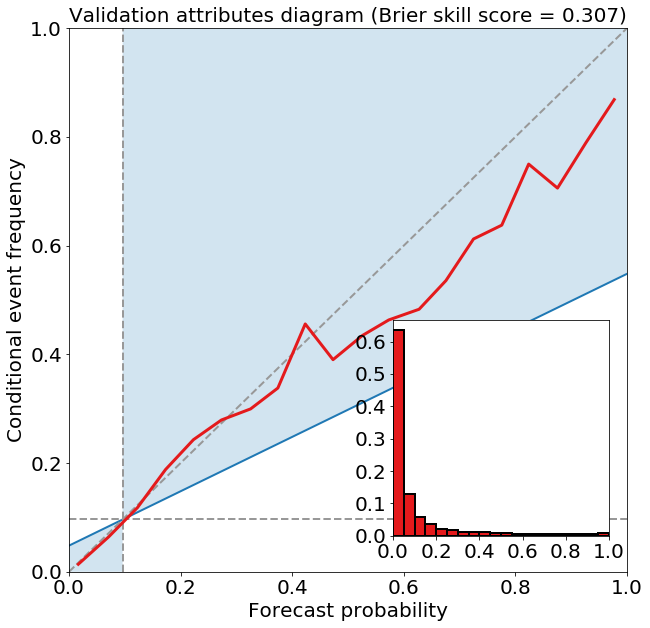

In [12]:

validation_probabilities = plain_log_model_object.predict_proba(
    validation_predictor_table.as_matrix()
)[:, 1]

_ = utils.eval_binary_classifn(
    observed_labels=validation_target_table[
        utils.BINARIZED_TARGET_NAME].values,
    forecast_probabilities=validation_probabilities,
    training_event_frequency=training_event_frequency,
    dataset_name='validation')

# Logistic Regression: Coefficients

 - The next cell plots coefficients for the logistic-regression model.
 - Positive (negative) coefficients mean that probability increases (decreases) with the predictor variable.
 - Again, predictors have been normalized to the same scale ($z$-scores), so generally predictors with larger coefficients are more important.

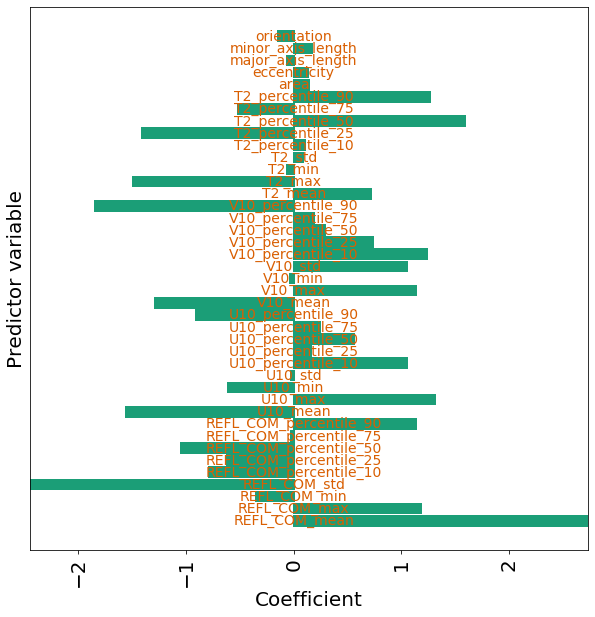

In [13]:
utils.plot_model_coefficients(
    model_object=plain_log_model_object,
    predictor_names=list(training_predictor_table)
)

pyplot.show()

# Logistic Regression with $L_1$ and $L_2$

 - The next cell trains a logistic-regression model with both $L_1$ and $L_2$ regularization.
 - As for linear regression, you could do a hyperparameter experiment to find the best $\lambda_1$ and $\lambda_2$ for logistic regression.
 - Now you can see why just saying "lasso regression" or "ridge regression" or "elastic-net regression" is not descriptive enough.  This type of regularization can be applied to different base models.

Validation Max Peirce score (POD - POFD) = 0.662
Validation AUC (area under ROC curve) = 0.907
Validation Max CSI (critical success index) = 0.395
Validation Brier score = 0.062
Validation Brier skill score (improvement over climatology) = 0.318


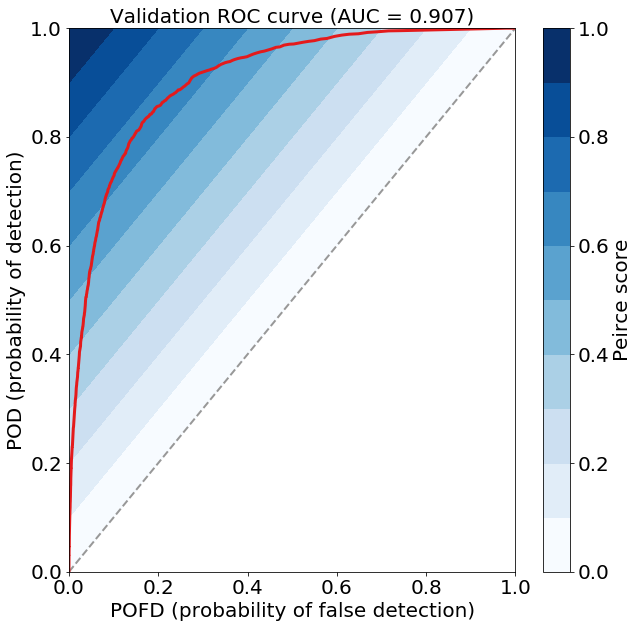

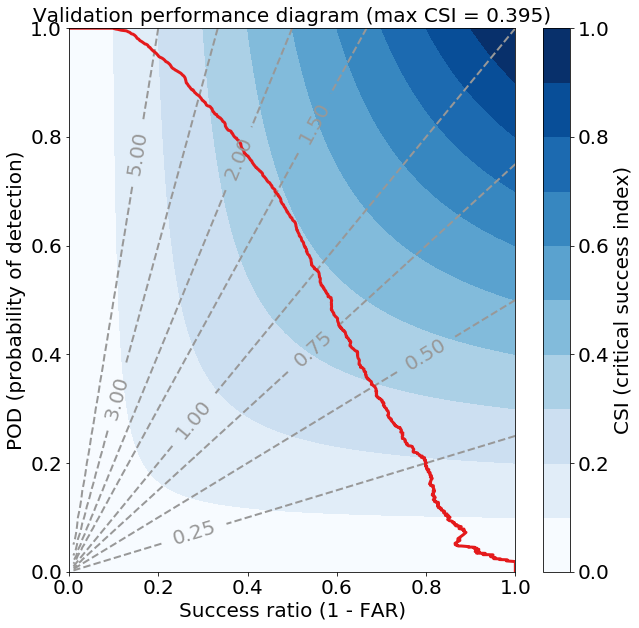

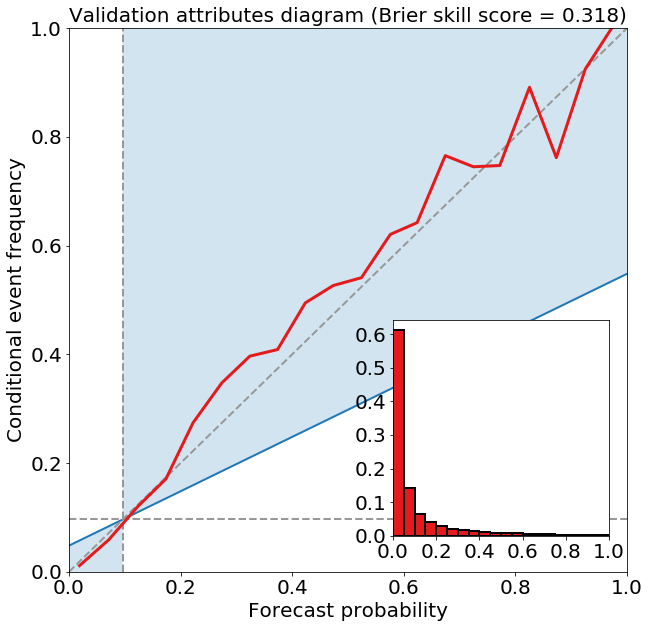

{'max_peirce_score': 0.6619912879841929,
 'area_under_roc_curve': 0.9069790125489064,
 'max_csi': 0.395419078781777,
 'brier_score': 0.06154797422360745,
 'brier_skill_score': 0.318219542411668}

In [14]:
logistic_en_model_object = utils.setup_logistic_regression(
    lambda1=1e-3, lambda2=1e-3)

_ = utils.train_logistic_regression(
    model_object=logistic_en_model_object,
    training_predictor_table=training_predictor_table,
    training_target_table=training_target_table)

validation_probabilities = logistic_en_model_object.predict_proba(
    validation_predictor_table.as_matrix()
)[:, 1]
training_event_frequency = numpy.mean(
    training_target_table[utils.BINARIZED_TARGET_NAME].values
)

utils.eval_binary_classifn(
    observed_labels=validation_target_table[
        utils.BINARIZED_TARGET_NAME].values,
    forecast_probabilities=validation_probabilities,
    training_event_frequency=training_event_frequency,
    dataset_name='validation')

# Logistic Regression with $L_1$ and $L_2$: Coefficients

The next cell plots coefficients for the logistic-regression model with both penalties.
<br><br>
Many coefficients are zero, and the non-zero ones are about an order of magnitude smaller than for the original model.

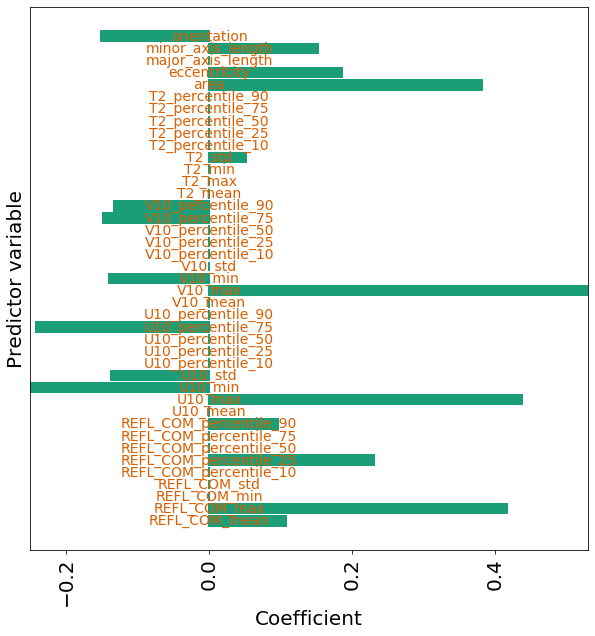

In [15]:
utils.plot_model_coefficients(
    model_object=logistic_en_model_object,
    predictor_names=list(training_predictor_table)
)

pyplot.show()

# Decision Trees
 - Decision trees have been used in meteorology since the 1960s (Chisholm 1968).
 - They were built subjectively by human experts until the 1980s, when an objective algorithm (Quinlan 1986) was developed to "train" them (determine the best question at each branch node).
 - A decision tree is a flow chart with **branch nodes** (ellipses) and **leaf nodes** (rectangles).  In the figure below, $f$ is the forecast probability of severe weather.
<img src="tree_schematic.jpg" alt="Decision-tree schematic" width="500" />


 - The branch nodes are bifurcating, and the leaf nodes are terminal.
 - In other words, each branch node has 2 children and each leaf node has 0 children.
 - **Predictions are made at the leaf nodes, and questions are asked at the branch nodes.**
 - Since the branch nodes are bifurcating, **questions asked at the branch nodes must be yes-or-no.**
<br><br>
 - **The prediction at leaf node $L$ is the average of all training examples that reached $L$.**
 - For regression this is a real value (average max future vorticity of examples that reached $L$).
 - For classification this is a probability (fraction of examples that reached $L$ with max future vorticity $\ge 3.850 \times 10^{-3}\textrm{ s}^{-1}$).
<br><br>
 

- **The question chosen at each branch node is that which maximizes information gain.**
 - **This is done by minimizing the "remainder,"** which is based on entropy of the child nodes.
 - The entropy of one node is defined below.
<br><br>
$E = -\frac{1}{n} \left[ f\textrm{ log}_2(f) + f\textrm{ log}_2(f) \right]$
<br><br>
 - $n$ = number of examples at the node
 - $f$ = fraction of these examples that are in the positive class
<br>

**The "remainder" is defined as follows.**
<br><br>
$R = \frac{n_{\textrm{left}} E_{\textrm{left}} + n_{\textrm{right}} E_{\textrm{right}}}{n_{\textrm{left}} + n_{\textrm{right}}}$
<br><br>
 - $n_{\textrm{left}}$ = number of examples sent to left child (for which the answer to the question is "no")
<br>
 - $n_{\textrm{left}}$ = number of examples sent to right child (for which answer is "yes")
<br>
 - $E_{\textrm{left}}$ = entropy of left child
<br>
 - $E_{\textrm{right}}$ = entropy of right child

# Decision Tree: Example

The next cell trains a decision tree, with default hyperparameters, to forecast the probability that a storm will develop future vorticity $\ge 3.850 \times 10^{-3}\textrm{ s}^{-1}$.

In [16]:
# Setup a decision tree learning model in python: 
def setup_classification_tree(min_examples_at_split=30,
                              min_examples_at_leaf=30):
    """Sets up (but does not train) decision tree for classification.
    :param min_examples_at_split: Minimum number of examples at split node.
    :param min_examples_at_leaf: Minimum number of examples at leaf node.
    :return: model_object: Instance of `sklearn.tree.DecisionTreeClassifier`.
    """

    return sklearn.tree.DecisionTreeClassifier(
        criterion='entropy', min_samples_split=min_examples_at_split,
        min_samples_leaf=min_examples_at_leaf, random_state=RANDOM_SEED)


def train_classification_tree(model_object, training_predictor_table,
                              training_target_table):
    """Trains decision tree for classification.
    :param model_object: Untrained model created by `setup_classification_tree`.
    :param training_predictor_table: See doc for `read_feature_file`.
    :param training_target_table: Same.
    :return: model_object: Trained version of input.
    """

    model_object.fit(
        X=training_predictor_table.as_matrix(),
        y=training_target_table[BINARIZED_TARGET_NAME].values
    )

    return model_object

Training Max Peirce score (POD - POFD) = 0.781
Training AUC (area under ROC curve) = 0.955
Training Max CSI (critical success index) = 0.471
Training Brier score = 0.049
Training Brier skill score (improvement over climatology) = 0.459


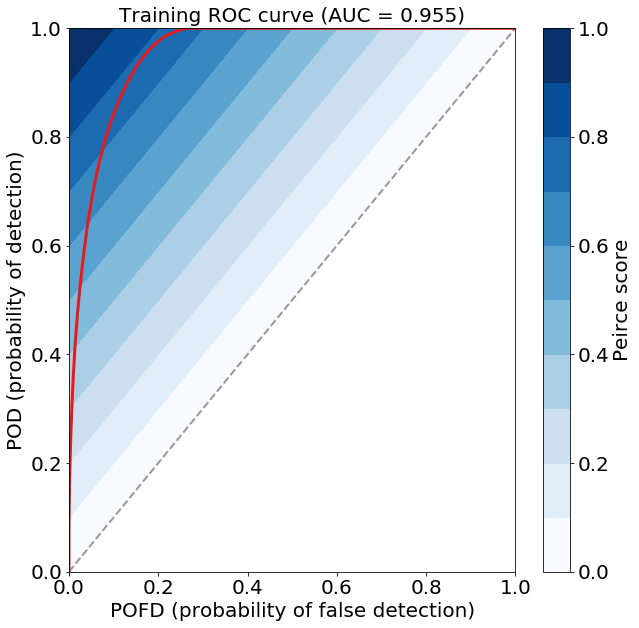

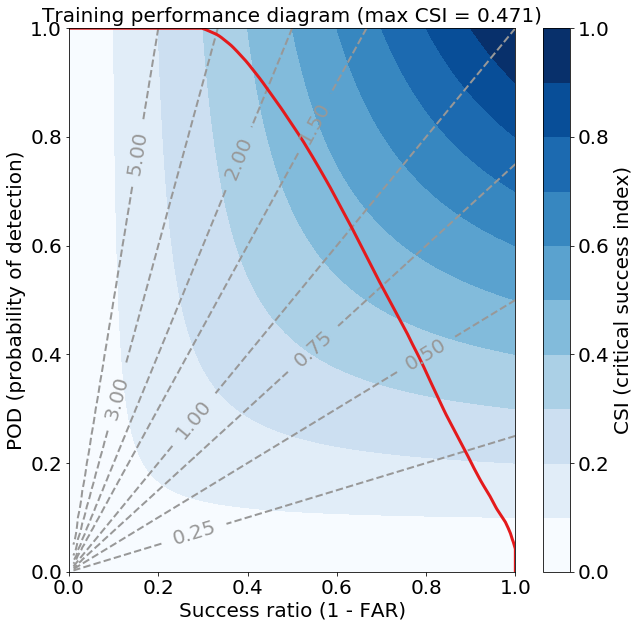

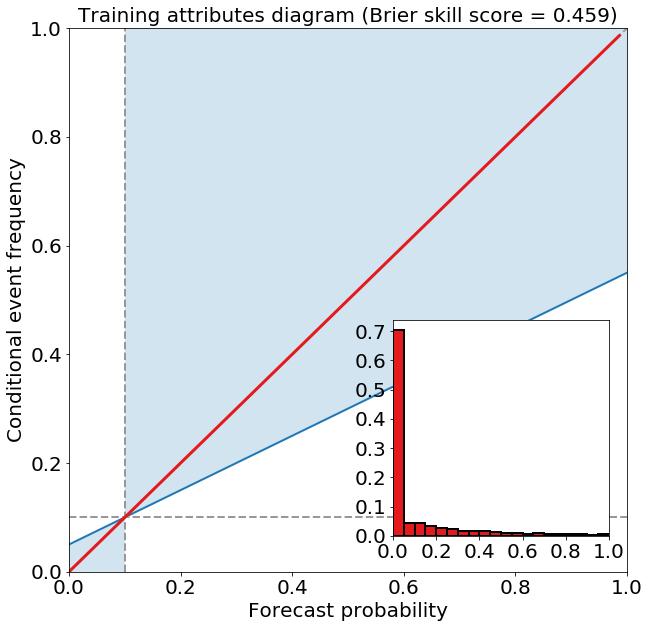

Validation Max Peirce score (POD - POFD) = 0.598
Validation AUC (area under ROC curve) = 0.854
Validation Max CSI (critical success index) = 0.342
Validation Brier score = 0.069
Validation Brier skill score (improvement over climatology) = 0.233


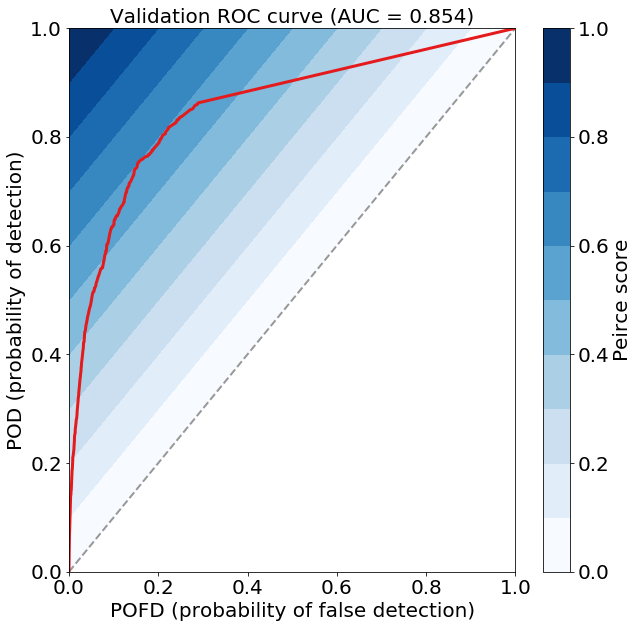

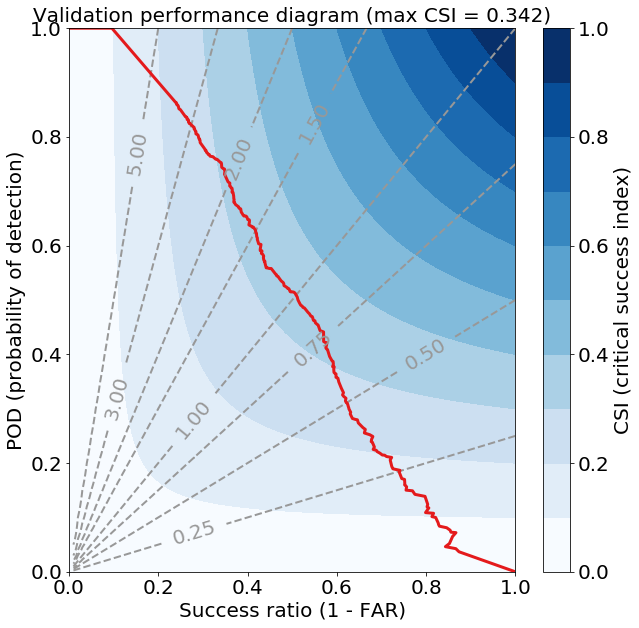

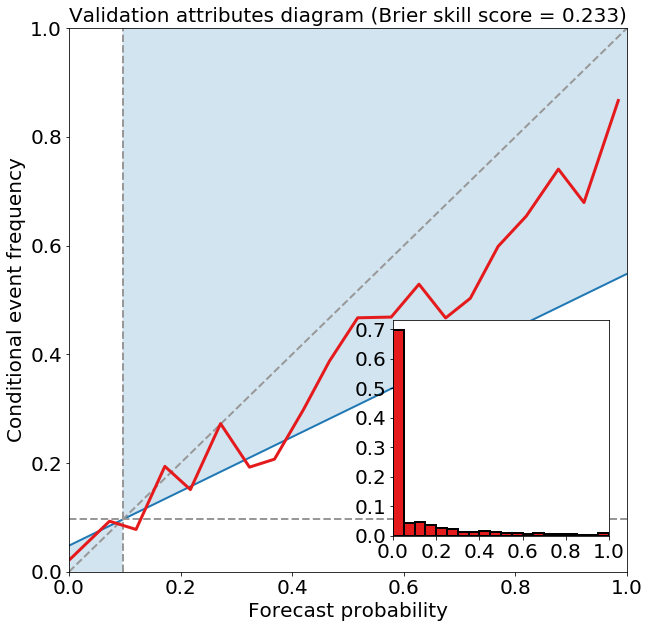

{'max_peirce_score': 0.5977671359299315,
 'area_under_roc_curve': 0.8539744298017814,
 'max_csi': 0.3418826739427013,
 'brier_score': 0.0692540584940177,
 'brier_skill_score': 0.23285755078856513}

In [17]:
default_tree_model_object = utils.setup_classification_tree(
    min_examples_at_split=30, min_examples_at_leaf=30)

_ = utils.train_classification_tree(
    model_object=default_tree_model_object,
    training_predictor_table=training_predictor_table,
    training_target_table=training_target_table)

training_probabilities = default_tree_model_object.predict_proba(
    training_predictor_table.as_matrix()
)[:, 1]
training_event_frequency = numpy.mean(
    training_target_table[utils.BINARIZED_TARGET_NAME].values
)

utils.eval_binary_classifn(
    observed_labels=training_target_table[
        utils.BINARIZED_TARGET_NAME].values,
    forecast_probabilities=training_probabilities,
    training_event_frequency=training_event_frequency,
    dataset_name='training')

validation_probabilities = default_tree_model_object.predict_proba(
    validation_predictor_table.as_matrix()
)[:, 1]

utils.eval_binary_classifn(
    observed_labels=validation_target_table[
        utils.BINARIZED_TARGET_NAME].values,
    forecast_probabilities=validation_probabilities,
    training_event_frequency=training_event_frequency,
    dataset_name='validation')

## Another way to check the overfitting problem by learning Curve
The next cell plots learning curve for the logistic-regression model with both penalties. 

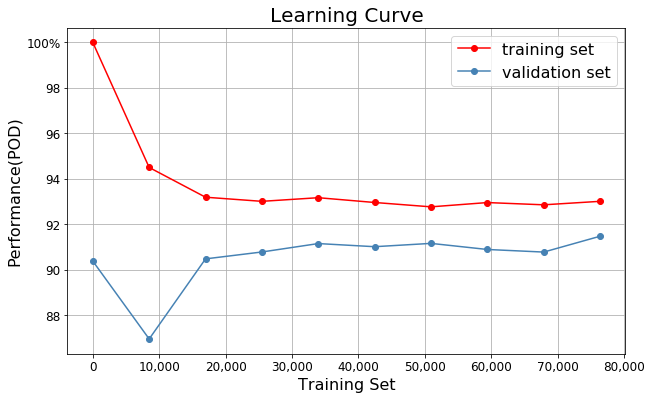

In [18]:
classifier = default_tree_model_object 

_= utils.plot_learning_curves(classifier, training_predictor_table, training_target_values, validation_predictor_table, validation_target_table[
        utils.BINARIZED_TARGET_NAME].values, title='Learning Curve', xlabel='Training Set', ylabel='Performance(POD)')


# Hyperparameter Experiment with Minimum Sample Size

 - **Two hyperparameters (among others) control the depth of a decision tree:** minimum examples per branch node ($N_b^{\textrm{min}}$) and per leaf node ($N_l^{\textrm{min}}$).
 - If these values are set to 1, the tree can become very deep, which increases its ability to overfit.
 - You can think of this another way: if there is one example at each leaf node, all predictions will be based on only one example and will probably not generalize well to new data.
 - Conversely, if $N_b^{\textrm{min}}$ and $N_l^{\textrm{min}}$ are set too high, the tree will not become deep enough, causing it to underfit.
 - For example, suppose that you have 1000 training examples and set $N_l^{\textrm{min}}$ to 1000.
 - This will allow only one branch node (the root node); both children of the root node will have $<$ 1000 examples.
 - Thus, predictions will be based on only one question.

**Recall the four steps of any hyperparameter experiment:**

 1. Choose the values to be attempted.  We will try $N_b^{\textrm{min}} \in \lbrace 2, 5, 10, 20, 30, 40, 50, 100, 200, 500 \rbrace$ and $N_l^{\textrm{min}} \in \lbrace 1, 5, 10, 20, 30, 40, 50, 100, 200, 500 \rbrace$.  However, we will not try combinations where $N_l^{\textrm{min}} \ge N_b^{\textrm{min}}$, because this makes no sense (the child of a node with $N$ examples cannot have $\ge N$ examples).
 2. Train a model with each combination.
 3. Evaluate each model on the validation data.
 4. Select the model that performs best on validation data.  Here we will define "best" as that with the highest Brier skill score.

# Hyperparameter Experiment: Training

The next cell performs steps 1 and 2 of the hyperparameter experiment (defining the values to be attempted and training the models).



In [19]:
min_per_split_values = numpy.array(
    [2, 5, 10, 20, 30, 40, 50, 100, 200, 500], dtype=int)
min_per_leaf_values = numpy.array(
    [1, 5, 10, 20, 30, 40, 50, 100, 200, 500], dtype=int)

num_min_per_split_values = len(min_per_split_values)
num_min_per_leaf_values = len(min_per_leaf_values)

validation_auc_matrix = numpy.full(
    (num_min_per_split_values, num_min_per_leaf_values), numpy.nan
)

validation_max_csi_matrix = validation_auc_matrix + 0.
validation_bs_matrix = validation_auc_matrix + 0.
validation_bss_matrix = validation_auc_matrix + 0.

training_event_frequency = numpy.mean(
    training_target_table[utils.BINARIZED_TARGET_NAME].values
)

for i in range(num_min_per_split_values):
    for j in range(num_min_per_leaf_values):
        if min_per_leaf_values[j] >= min_per_split_values[i]:
            continue

        this_message_string = (
            'Training model with minima of {0:d} examples per split node, '
            '{1:d} per leaf node...'
        ).format(min_per_split_values[i], min_per_leaf_values[j])

        print(this_message_string)

        this_model_object = utils.setup_classification_tree(
            min_examples_at_split=min_per_split_values[i],
            min_examples_at_leaf=min_per_leaf_values[j]
        )

        _ = utils.train_classification_tree(
            model_object=this_model_object,
            training_predictor_table=training_predictor_table,
            training_target_table=training_target_table)

        these_validation_predictions = this_model_object.predict_proba(
            validation_predictor_table.as_matrix()
        )[:, 1]

        this_evaluation_dict = utils.eval_binary_classifn(
            observed_labels=validation_target_table[
                utils.BINARIZED_TARGET_NAME].values,
            forecast_probabilities=these_validation_predictions,
            training_event_frequency=training_event_frequency,
            create_plots=False, verbose=False)

        validation_auc_matrix[i, j] = this_evaluation_dict[utils.AUC_KEY]
        validation_max_csi_matrix[i, j] = this_evaluation_dict[
            utils.MAX_CSI_KEY]
        validation_bs_matrix[i, j] = this_evaluation_dict[
            utils.BRIER_SCORE_KEY]
        validation_bss_matrix[i, j] = this_evaluation_dict[
            utils.BRIER_SKILL_SCORE_KEY]

Training model with minima of 2 examples per split node, 1 per leaf node...
Training model with minima of 5 examples per split node, 1 per leaf node...
Training model with minima of 10 examples per split node, 1 per leaf node...
Training model with minima of 10 examples per split node, 5 per leaf node...
Training model with minima of 20 examples per split node, 1 per leaf node...
Training model with minima of 20 examples per split node, 5 per leaf node...
Training model with minima of 20 examples per split node, 10 per leaf node...
Training model with minima of 30 examples per split node, 1 per leaf node...
Training model with minima of 30 examples per split node, 5 per leaf node...
Training model with minima of 30 examples per split node, 10 per leaf node...
Training model with minima of 30 examples per split node, 20 per leaf node...
Training model with minima of 40 examples per split node, 1 per leaf node...
Training model with minima of 40 examples per split node, 5 per leaf node..

# Hyperparameter Experiment: Validation

The next cell performs step 3 of the hyperparameter experiment (evaluates each model on the validation data).

Text(0.5, 1.0, 'Brier skill score on validation data')

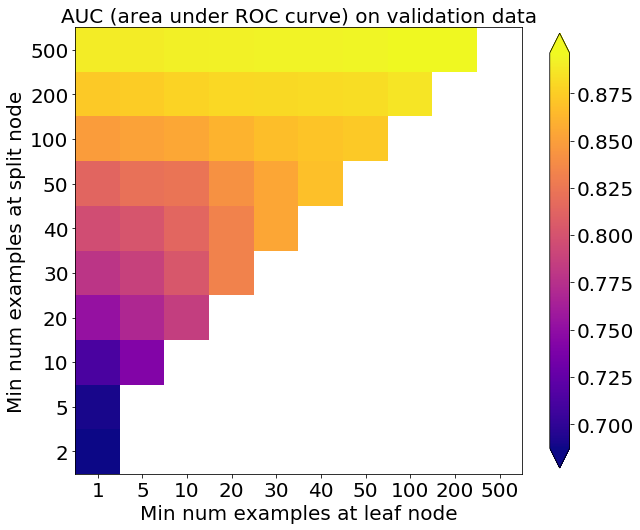

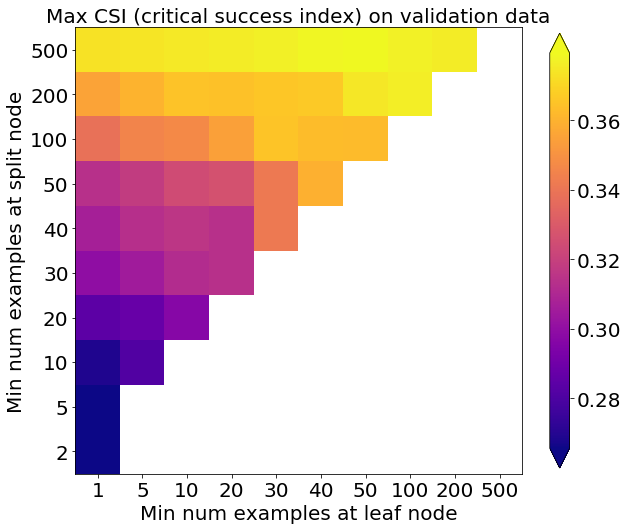

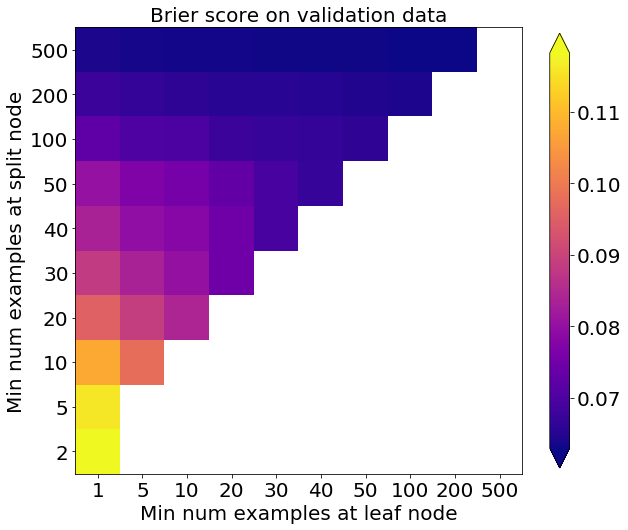

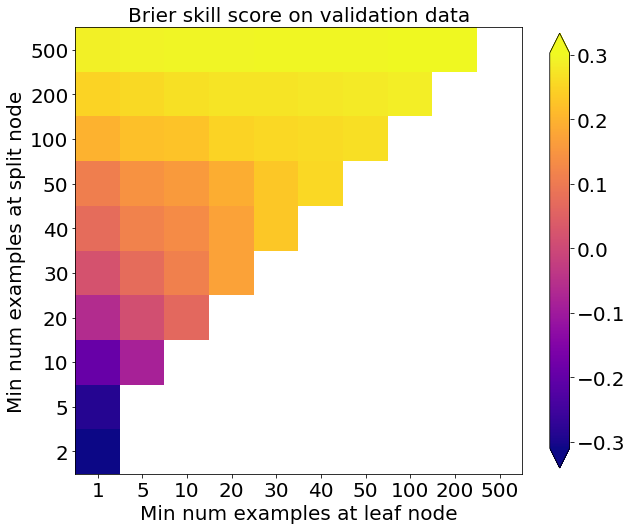

In [20]:
utils.plot_scores_2d(
    score_matrix=validation_auc_matrix,
    min_colour_value=numpy.nanpercentile(validation_auc_matrix, 1.),
    max_colour_value=numpy.nanpercentile(validation_auc_matrix, 99.),
    x_tick_labels=min_per_leaf_values,
    y_tick_labels=min_per_split_values
)

pyplot.xlabel('Min num examples at leaf node')
pyplot.ylabel('Min num examples at split node')
pyplot.title('AUC (area under ROC curve) on validation data')

utils.plot_scores_2d(
    score_matrix=validation_max_csi_matrix,
    min_colour_value=numpy.nanpercentile(validation_max_csi_matrix, 1.),
    max_colour_value=numpy.nanpercentile(validation_max_csi_matrix, 99.),
    x_tick_labels=min_per_leaf_values,
    y_tick_labels=min_per_split_values
)

pyplot.xlabel('Min num examples at leaf node')
pyplot.ylabel('Min num examples at split node')
pyplot.title('Max CSI (critical success index) on validation data')

utils.plot_scores_2d(
    score_matrix=validation_bs_matrix,
    min_colour_value=numpy.nanpercentile(validation_bs_matrix, 1.),
    max_colour_value=numpy.nanpercentile(validation_bs_matrix, 99.),
    x_tick_labels=min_per_leaf_values,
    y_tick_labels=min_per_split_values
)

pyplot.xlabel('Min num examples at leaf node')
pyplot.ylabel('Min num examples at split node')
pyplot.title('Brier score on validation data')

utils.plot_scores_2d(
    score_matrix=validation_bss_matrix,
    min_colour_value=numpy.nanpercentile(validation_bss_matrix, 1.),
    max_colour_value=numpy.nanpercentile(validation_bss_matrix, 99.),
    x_tick_labels=min_per_leaf_values,
    y_tick_labels=min_per_split_values
)

pyplot.xlabel('Min num examples at leaf node')
pyplot.ylabel('Min num examples at split node')
pyplot.title('Brier skill score on validation data')

# Hyperparameter Experiment: Selection

The next cell performs step 4 of the hyperparameter experiment (select model).

Best validation BSS = 0.304 ... corresponding min examples per split node = 500 ... min examples per leaf node = 200
Testing Max Peirce score (POD - POFD) = 0.657
Testing AUC (area under ROC curve) = 0.900
Testing Max CSI (critical success index) = 0.423
Testing Brier score = 0.053
Testing Brier skill score (improvement over climatology) = 0.412


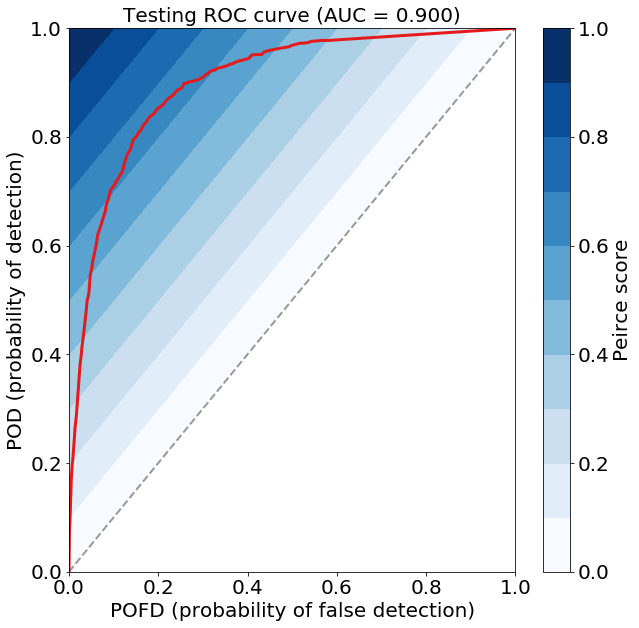

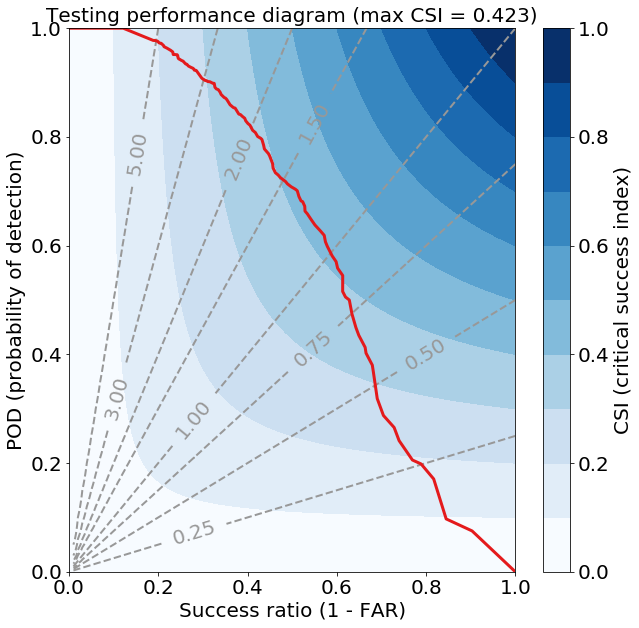

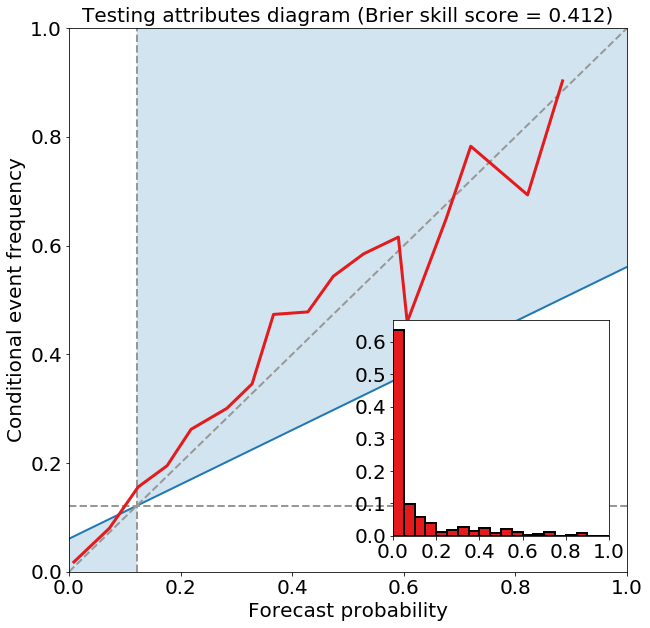

In [21]:
best_linear_index = numpy.nanargmax(numpy.ravel(validation_bss_matrix))

best_split_index, best_leaf_index = numpy.unravel_index(
    best_linear_index, validation_bss_matrix.shape)

best_min_examples_per_split = min_per_split_values[best_split_index]
best_min_examples_per_leaf = min_per_leaf_values[best_leaf_index]
best_validation_bss = numpy.nanmax(validation_bss_matrix)

message_string = (
    'Best validation BSS = {0:.3f} ... corresponding min examples per split'
    ' node = {1:d} ... min examples per leaf node = {2:d}'
).format(
    best_validation_bss, best_min_examples_per_split,
    best_min_examples_per_leaf
)

print(message_string)

final_model_object = utils.setup_classification_tree(
    min_examples_at_split=best_min_examples_per_split,
    min_examples_at_leaf=best_min_examples_per_leaf
)

_ = utils.train_classification_tree(
    model_object=final_model_object,
    training_predictor_table=training_predictor_table,
    training_target_table=training_target_table)

testing_predictions = final_model_object.predict_proba(
    testing_predictor_table.as_matrix()
)[:, 1]
training_event_frequency = numpy.mean(
    training_target_table[utils.BINARIZED_TARGET_NAME].values
)

_ = utils.eval_binary_classifn(
    observed_labels=testing_target_table[
        utils.BINARIZED_TARGET_NAME].values,
    forecast_probabilities=testing_predictions,
    training_event_frequency=training_event_frequency,
    create_plots=True, verbose=True, dataset_name='testing')

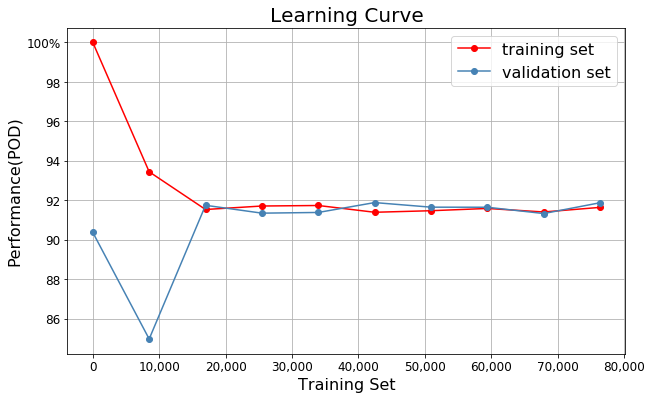

In [22]:
classifier = final_model_object

_= utils.plot_learning_curves(classifier, training_predictor_table, training_target_values, validation_predictor_table, validation_target_table[
        utils.BINARIZED_TARGET_NAME].values, title='Learning Curve', xlabel='Training Set', ylabel='Performance(POD)')

# Random Forests

 - **A random forest is an ensemble of decision trees.**
 - In the first example with decision trees, you may have noticed a lot of **overfitting.**
 - **This is generally a problem with decision trees**, because they rely on exact thresholds, which introduce "jumps" into the decision function.
 - For example, in the tree shown below, a difference of 0.0001 J kg$^{-1}$ in CAPE could lead to a difference of 55% in tornado probability.

<img src="tree_schematic.jpg" alt="Decision-tree schematic" width="500" />


 - One way to mitigate this overfitting is: train a bunch of decision trees.
 - **If the decision trees are diverse enough, they will hopefully have offsetting biases** (overfit in different ways).
 - **Random forests ensure diversity in two ways:**
     - Example-bagging
     - Predictor-bagging (or "feature-bagging")
<br><br>
 - **Example-bagging** is done by training each tree with a **bootstrapped replicate** of the training data.
 - For a training set with $N$ examples, **a "bootstrapped replicate" is created by randomly sampling $N$ examples with replacement.**
 - Sampling with replacement leads to duplicates.  On average, each bootstrapped replicate contains only 63.2% ($1 - e^{-1}$) of unique examples, with the other 37.8% being duplicates.
 - This ensures that each tree is trained with a different set of unique examples.

 - **Predictor-bagging** is done by looping over a random subset of predictors at each branch node.
 - In other words, instead of trying all predictors to find the best question, try only a few predictors.
 - If there are $M$ predictors, the general rule is to try $\sqrt{M}$ predictors at each branch node.
 - In our case there are 41 predictors, so each branch node will loop over 6 randomly chosen predictors.

# Random Forests: Example

The next cell trains a random forest with the following hyperparameters:

 - 100 trees
 - 6 predictors attempted at each leaf node
 - Minimum of 500 examples at a branch node
 - Minimum of 200 examples at a leaf node

In [23]:
# Setup a Random Forest learning model in python: 

def setup_classification_forest(
        max_predictors_per_split, num_trees=100, min_examples_at_split=30,
        min_examples_at_leaf=30):
    """Sets up (but does not train) random forest for classification.
    :param max_predictors_per_split: Max number of predictors to try at each
        split.
    :param num_trees: Number of trees.
    :param min_examples_at_split: Minimum number of examples at split node.
    :param min_examples_at_leaf: Minimum number of examples at leaf node.
    :return: model_object: Instance of
        `sklearn.ensemble.RandomForestClassifier`.
    """

    return sklearn.ensemble.RandomForestClassifier(
        n_estimators=num_trees, min_samples_split=min_examples_at_split,
        min_samples_leaf=min_examples_at_leaf,
        max_features=max_predictors_per_split, bootstrap=True,
        random_state=RANDOM_SEED, verbose=2)


def train_classification_forest(model_object, training_predictor_table,
                                training_target_table):
    """Trains random forest for classification.
    :param model_object: Untrained model created by
        `setup_classification_forest`.
    :param training_predictor_table: See doc for `read_feature_file`.
    :param training_target_table: Same.
    :return: model_object: Trained version of input.
    """

    model_object.fit(
        X=training_predictor_table.as_matrix(),
        y=training_target_table[BINARIZED_TARGET_NAME].values
    )

    return model_object


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


Training Max Peirce score (POD - POFD) = 0.675
Training AUC (area under ROC curve) = 0.917
Training Max CSI (critical success index) = 0.394
Training Brier score = 0.060
Training Brier skill score (improvement over climatology) = 0.335


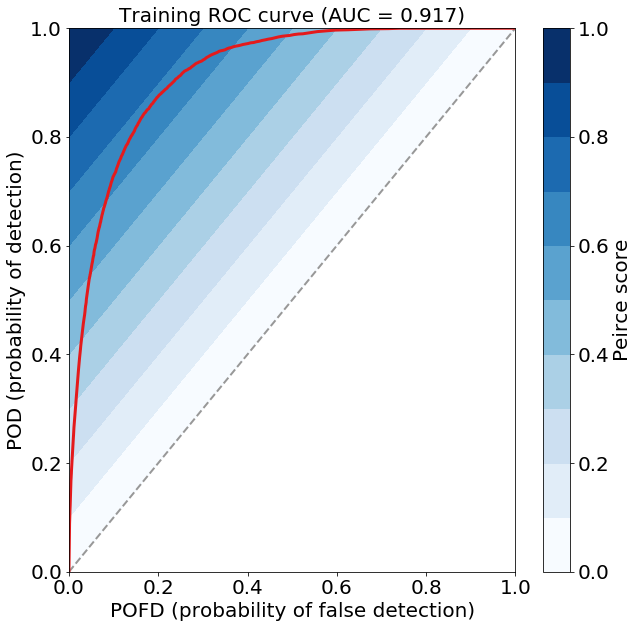

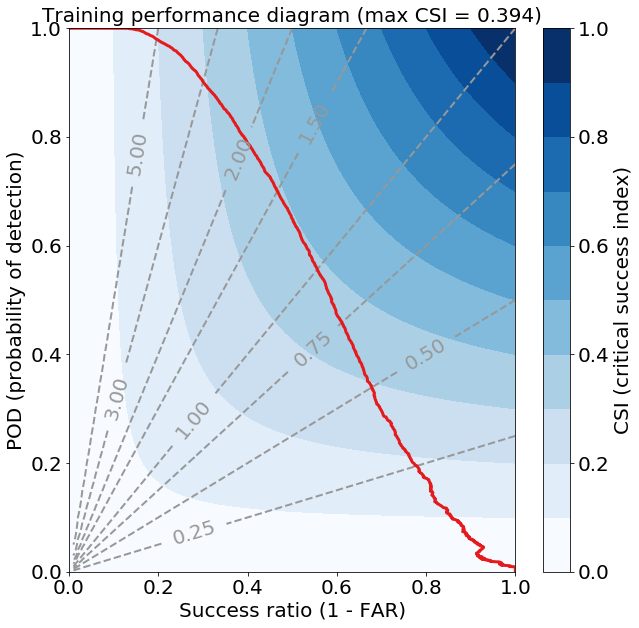

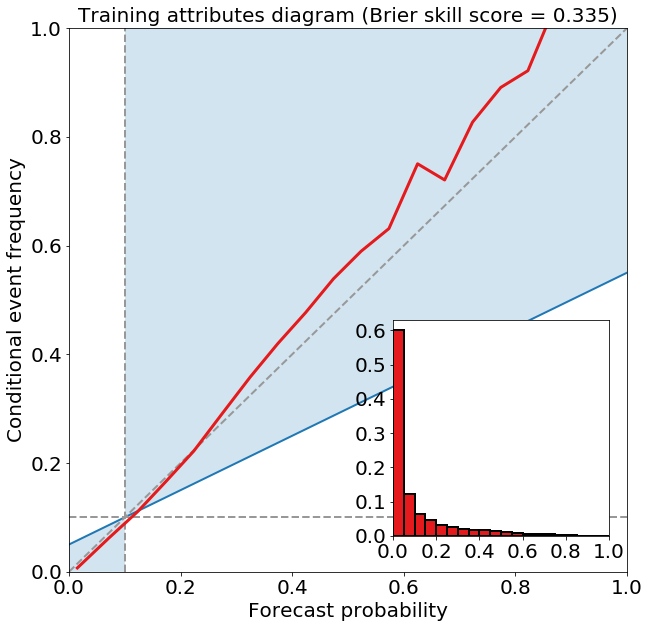

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Validation Max Peirce score (POD - POFD) = 0.670
Validation AUC (area under ROC curve) = 0.913
Validation Max CSI (critical success index) = 0.401
Validation Brier score = 0.061
Validation Brier skill score (improvement over climatology) = 0.328


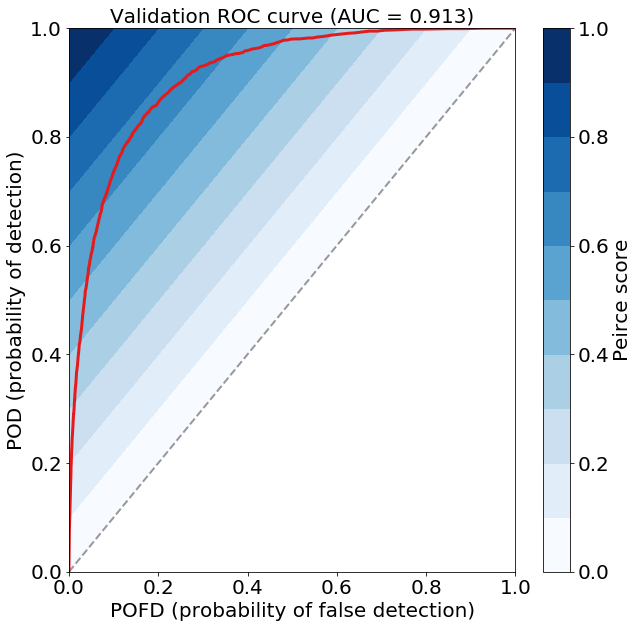

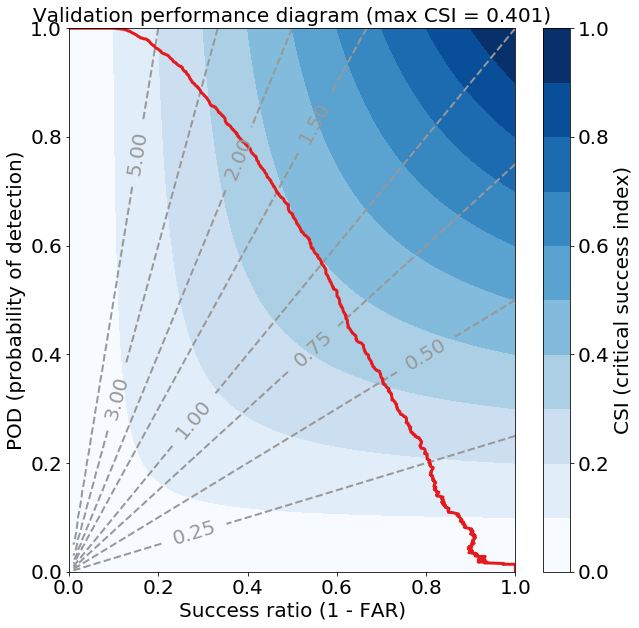

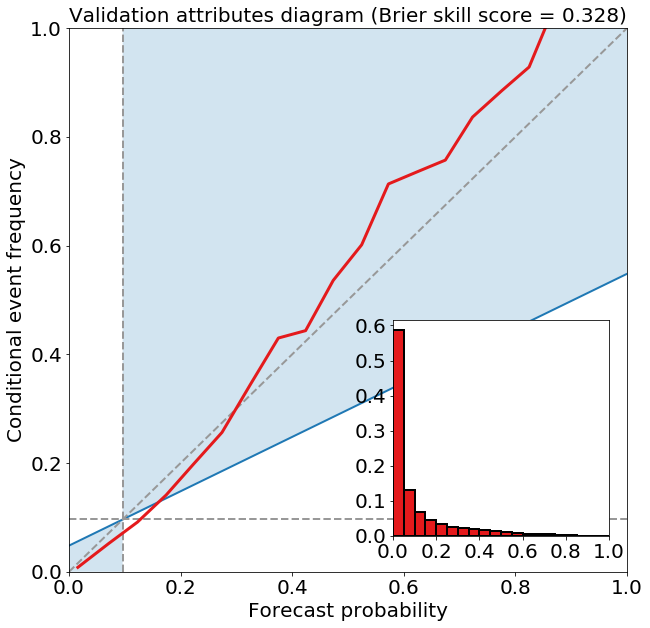

{'max_peirce_score': 0.6695651841996653,
 'area_under_roc_curve': 0.9134531379240309,
 'max_csi': 0.4013440860215054,
 'brier_score': 0.06069344408402461,
 'brier_skill_score': 0.3276853608555242}

In [24]:
num_predictors = len(list(training_predictor_table))
max_predictors_per_split = int(numpy.round(
    numpy.sqrt(num_predictors)
))

random_forest_model_object = utils.setup_classification_forest(
    max_predictors_per_split=max_predictors_per_split,
    num_trees=100, min_examples_at_split=500, min_examples_at_leaf=200)

_ = utils.train_classification_forest(
    model_object=random_forest_model_object,
    training_predictor_table=training_predictor_table,
    training_target_table=training_target_table)

training_probabilities = random_forest_model_object.predict_proba(
    training_predictor_table.as_matrix()
)[:, 1]
training_event_frequency = numpy.mean(
    training_target_table[utils.BINARIZED_TARGET_NAME].values
)

utils.eval_binary_classifn(
    observed_labels=training_target_table[
        utils.BINARIZED_TARGET_NAME].values,
    forecast_probabilities=training_probabilities,
    training_event_frequency=training_event_frequency,
    dataset_name='training')

validation_probabilities = random_forest_model_object.predict_proba(
    validation_predictor_table.as_matrix()
)[:, 1]

utils.eval_binary_classifn(
    observed_labels=validation_target_table[
        utils.BINARIZED_TARGET_NAME].values,
    forecast_probabilities=validation_probabilities,
    training_event_frequency=training_event_frequency,
    dataset_name='validation')

# Practice 
plot the learning curve for Random Forest and intrepret the results. 

In [ ]:
classifier = random_forest_model_object

_= utils.plot_learning_curves(classifier, training_predictor_table, training_target_values, validation_predictor_table, validation_target_table[
        utils.BINARIZED_TARGET_NAME].values, title='Learning Curve', xlabel='Training Set', ylabel='Performance(POD)')

# Hyperparameter Experiment with Minimum Sample Size

 - **Two hyperparameters (among others) control the depth of a decision tree:** minimum examples per branch node ($N_b^{\textrm{min}}$) and per leaf node ($N_l^{\textrm{min}}$).
 - If these values are set to 1, the tree can become very deep, which increases its ability to overfit.
 - You can think of this another way: if there is one example at each leaf node, all predictions will be based on only one example and will probably not generalize well to new data.
 - Conversely, if $N_b^{\textrm{min}}$ and $N_l^{\textrm{min}}$ are set too high, the tree will not become deep enough, causing it to underfit.
 - For example, suppose that you have 1000 training examples and set $N_l^{\textrm{min}}$ to 1000.
 - This will allow only one branch node (the root node); both children of the root node will have $<$ 1000 examples.
 - Thus, predictions will be based on only one question.

In [25]:
import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in numpy.linspace(start = 10, stop = 200, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in numpy.linspace(1, 10, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = numpy.array(
    [2, 5, 10, 20, 30, 40, 50, 100, 200, 500], dtype=int)
# Minimum number of samples required at each leaf node
min_samples_leaf = numpy.array(
    [1, 5, 10, 20, 30, 40, 50, 100, 200, 500], dtype=int)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 4, 7, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': array([  1,   5,  10,  20,  30,  40,  50, 100, 200, 500]),
 'min_samples_split': array([  2,   5,  10,  20,  30,  40,  50, 100, 200, 500]),
 'n_estimators': [10, 73, 136, 200]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(RandomForestClassifier(), random_grid, cv=3, n_jobs=-1)
clf.fit(training_predictor_table, training_target_table[utils.BINARIZED_TARGET_NAME].values)
clf.best_params_

# Gradient-boosted Trees

 - **Gradient-boosting is another way to ensemble decision trees.**
 - In a random forest the trees are trained independently of each other.
 - In a gradient-boosted ensemble (or "gradient-boosted forest"), the $k^{\textrm{th}}$ tree is trained to fit residuals from the first $k$ - 1 trees.
 - The "residual" for the $i^{\textrm{th}}$ example is $y_i - p_i$.
<br><br>
 - Gradient-boosted trees can still use example-bagging and predictor-bagging.
 - However, in most libraries the default is no example-bagging or predictor-bagging (train each tree with all examples and attempt all predictors at each branch node).

 - In a random forest the trees can be trained in parallel (each tree is independent of the others), which makes random forests faster.
 - In a gradient-boosted ensemble the trees must be trained in series, which makes them slower.
 - However, **in practice gradient-boosting usually outperforms random forests.**
 - In a recent contest for solar-energy prediction, the top 3 teams all used gradient-boosted trees (McGovern *et al*. 2015).

# Gradient-boosted Trees: Example

The next cell trains a gradient-boosted ensemble with the following hyperparameters:

 - No example-bagging
 - No predictor-bagging
 - 100 trees
 - Minimum of 500 examples at a branch node
 - Minimum of 200 examples at a leaf node

building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


Training Max Peirce score (POD - POFD) = 0.681
Training AUC (area under ROC curve) = 0.920
Training Max CSI (critical success index) = 0.399
Training Brier score = 0.059
Training Brier skill score (improvement over climatology) = 0.347


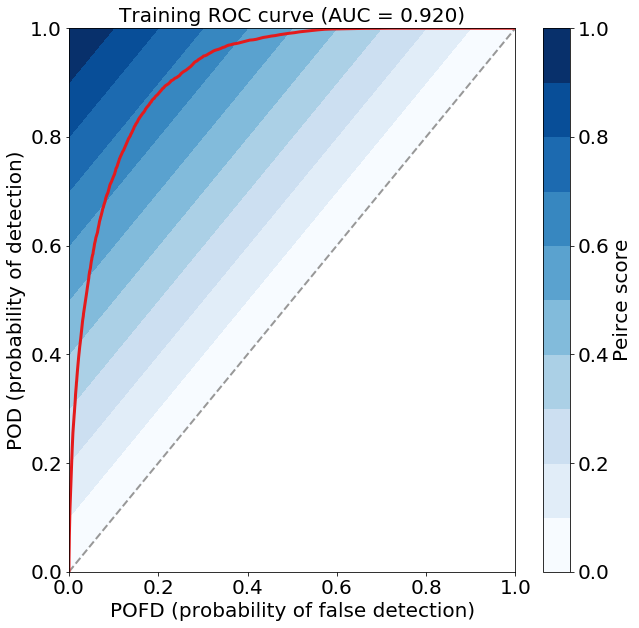

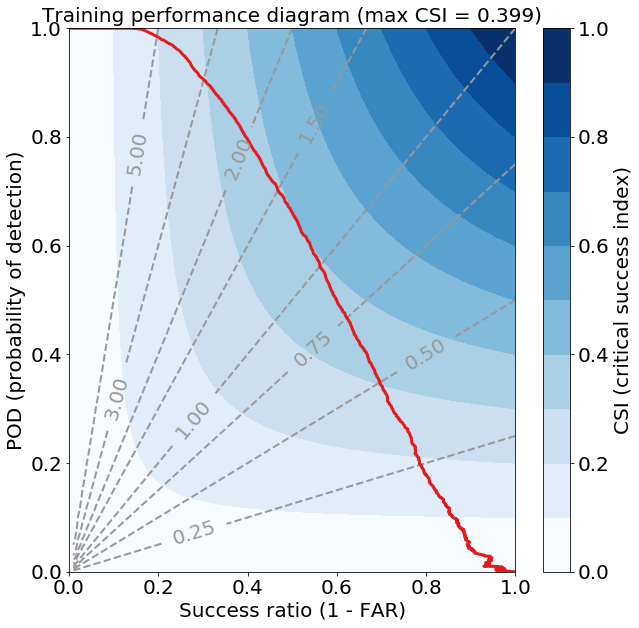

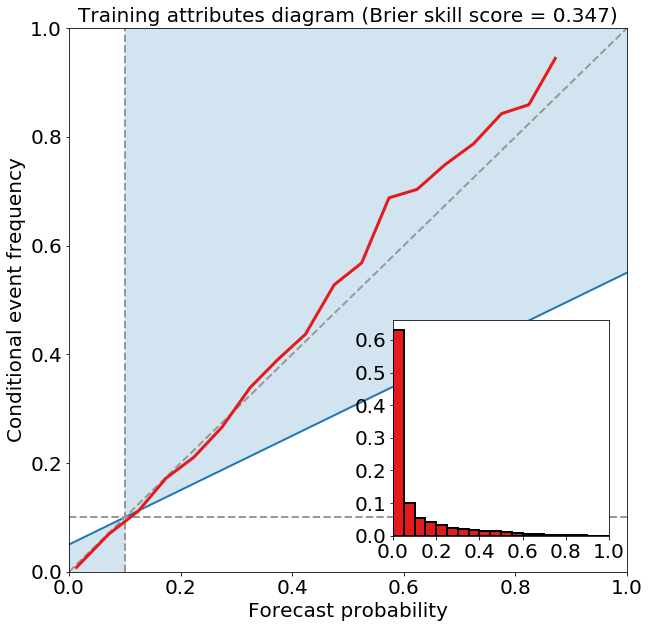

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Validation Max Peirce score (POD - POFD) = 0.665
Validation AUC (area under ROC curve) = 0.912
Validation Max CSI (critical success index) = 0.398
Validation Brier score = 0.061
Validation Brier skill score (improvement over climatology) = 0.326


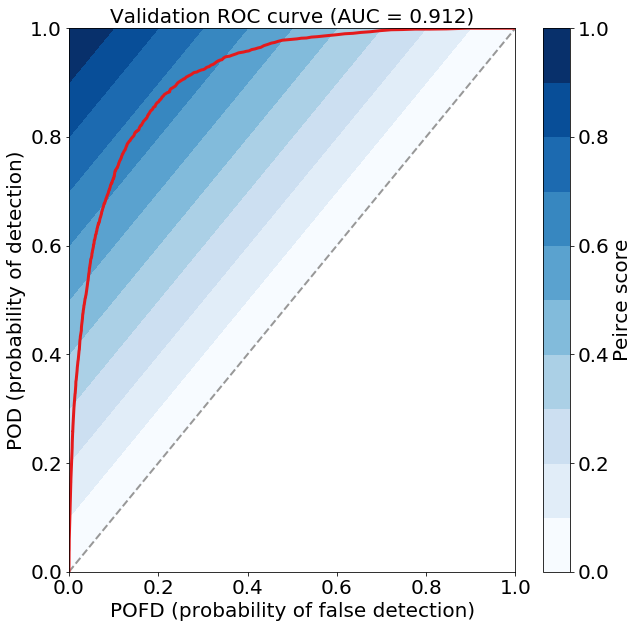

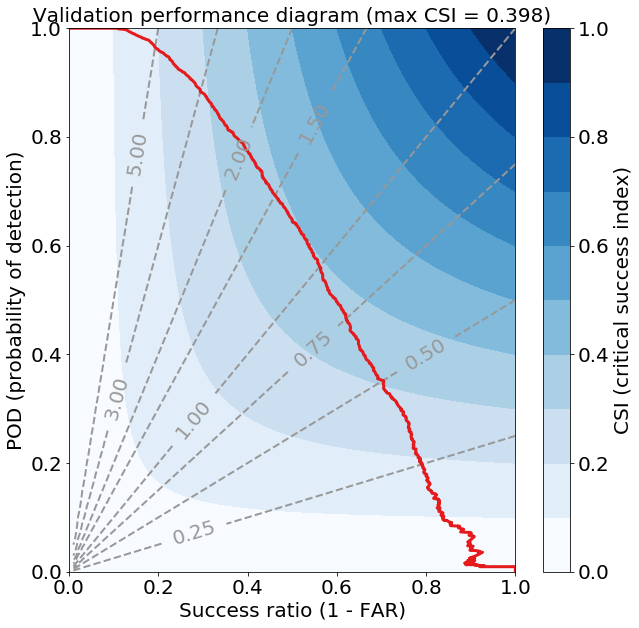

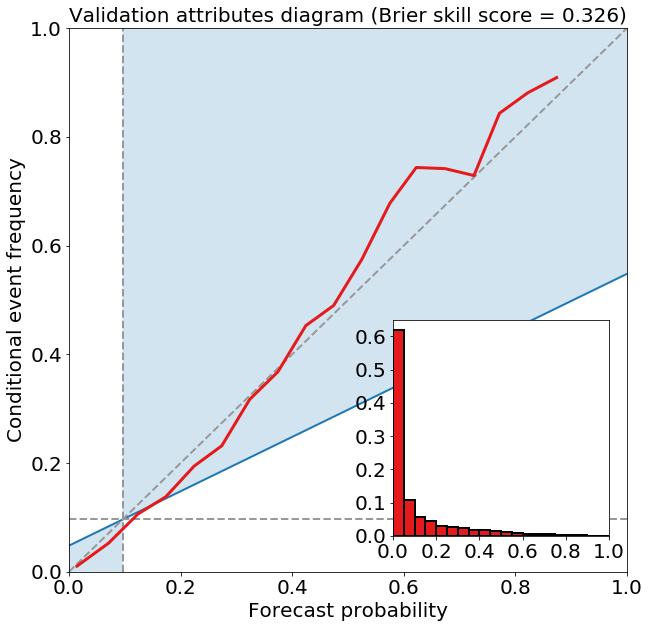

{'max_peirce_score': 0.665479294198189,
 'area_under_roc_curve': 0.9120369007024368,
 'max_csi': 0.3978121664887941,
 'brier_score': 0.06089007917472215,
 'brier_skill_score': 0.32550719067519246}

In [26]:
num_predictors = len(list(training_predictor_table))
# max_predictors_per_split = int(numpy.round(
#     numpy.sqrt(num_predictors)
# ))

gbt_model_object = utils.setup_classification_forest(
    max_predictors_per_split=num_predictors, num_trees=100,
    min_examples_at_split=500, min_examples_at_leaf=200)

_ = utils.train_classification_gbt(
    model_object=gbt_model_object,
    training_predictor_table=training_predictor_table,
    training_target_table=training_target_table)

training_probabilities = gbt_model_object.predict_proba(
    training_predictor_table.as_matrix()
)[:, 1]
training_event_frequency = numpy.mean(
    training_target_table[utils.BINARIZED_TARGET_NAME].values
)

utils.eval_binary_classifn(
    observed_labels=training_target_table[
        utils.BINARIZED_TARGET_NAME].values,
    forecast_probabilities=training_probabilities,
    training_event_frequency=training_event_frequency,
    dataset_name='training')

validation_probabilities = gbt_model_object.predict_proba(
    validation_predictor_table.as_matrix()
)[:, 1]

utils.eval_binary_classifn(
    observed_labels=validation_target_table[
        utils.BINARIZED_TARGET_NAME].values,
    forecast_probabilities=validation_probabilities,
    training_event_frequency=training_event_frequency,
    dataset_name='validation')

# Neural Network














In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
parameter_space = {
    'hidden_layer_sizes': [(20,20), (50,50,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp = MLPClassifier(max_iter=100)
clf_MLP = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf_MLP.fit(training_predictor_table, training_target_table[utils.BINARIZED_TARGET_NAME].values)
print(clf_MLP.best_params_)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_MLP = MLPClassifier(solver='adam', alpha=0.05, hidden_layer_sizes=(20,20), random_state=1)
clf_MLP.fit(training_predictor_table, training_target_table[utils.BINARIZED_TARGET_NAME].values)

In [ ]:
MLP_model_object = utils.setup_classification_MLP(
    activation = 'relu', solver = 'lbfgs', alpha = 0.05, hidden_layer_size = (20,20))

_ = utils.train_classification_MLP(
    model_object=MLP_model_object,
    training_predictor_table=training_predictor_table,
    training_target_table=training_target_table[utils.BINARIZED_TARGET_NAME].values)

In [ ]:
training_probabilities = clf.predict(
    training_predictor_table.as_matrix())

training_event_frequency = numpy.mean(
    training_target_table[utils.BINARIZED_TARGET_NAME].values)
utils.eval_binary_classifn(
    observed_labels=training_target_table[
        utils.BINARIZED_TARGET_NAME].values,
    forecast_probabilities=training_probabilities,
    training_event_frequency=training_event_frequency,
    dataset_name='training')

validation_probabilities = clf.predict(
    validation_predictor_table.as_matrix()
)

utils.eval_binary_classifn(
    observed_labels=validation_target_table[
        utils.BINARIZED_TARGET_NAME].values,
    forecast_probabilities=validation_probabilities,
    training_event_frequency=training_event_frequency,
    dataset_name='validation')

# Support Vector Machines 
- instance-based model which the decision function is fully specified by a subset of training samples, the support vectors.  
- capable of performing classification, regression and even outlier detection. 
- SVM is quadratic programming problem. 
- You can think of an SVM classifier as fitting the widest possible street (hyperplain) between the classes (**called large margin classification**). 
- SVM can seperate the classes linearly called linear SVM (**Hard margin clssification**). The linear SVM will select a line that not only separates the two classes but stays as far away from the closest sample as possible.
- Also, it can be more flexiable model called **soft margin classification** by using kernel method. 
- There are polynomial kernel and Radial Basis Function (RBF) kernel methods. 


In [ ]:
svm_model_object = utils.setup_classification_SVM(
    kernel = 'rbf', C = 10,
    gamma = 1e-2,probability=True)

_ = utils.train_classification_SVM(
    model_object=svm_model_object,
    training_predictor_table=training_predictor_table,
    training_target_table=training_target_table)

In [ ]:
training_probabilities = clf.predict(
    training_predictor_table.as_matrix())

training_event_frequency = numpy.mean(
    training_target_table[utils.BINARIZED_TARGET_NAME].values)
utils.eval_binary_classifn(
    observed_labels=training_target_table[
        utils.BINARIZED_TARGET_NAME].values,
    forecast_probabilities=training_probabilities,
    training_event_frequency=training_event_frequency,
    dataset_name='training')

validation_probabilities = clf.predict(
    validation_predictor_table.as_matrix()
)

utils.eval_binary_classifn(
    observed_labels=validation_target_table[
        utils.BINARIZED_TARGET_NAME].values,
    forecast_probabilities=validation_probabilities,
    training_event_frequency=training_event_frequency,
    dataset_name='validation')

# Practice: hyperparameter tuning for SVM model
    
In the next cell try to find the best configuration of SVM model based on Gridsearch strategy and then based on what you learned so far you are able to train the SVM model based on the best parameteres and evaluate it. 

In [ ]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=3)
clf.fit(training_predictor_table, training_target_table[utils.BINARIZED_TARGET_NAME].values)

print("Best parameters set found on development set:")
print(clf.best_params_)

# Feature importance
In the next cell, the importance of each feature will be indicated and discussed. 

Feature ranking:
1. feature REFL_COM_mean (0.120188)
2. feature REFL_COM_max (0.113160)
3. feature REFL_COM_min (0.108187)
4. feature REFL_COM_std (0.094250)
5. feature REFL_COM_percentile_10 (0.069165)
6. feature REFL_COM_percentile_25 (0.067147)
7. feature REFL_COM_percentile_50 (0.065518)
8. feature REFL_COM_percentile_75 (0.059119)
9. feature REFL_COM_percentile_90 (0.057869)
10. feature U10_mean (0.040179)
11. feature U10_max (0.038972)
12. feature U10_min (0.027023)
13. feature U10_std (0.015584)
14. feature U10_percentile_10 (0.014935)
15. feature U10_percentile_25 (0.014428)
16. feature U10_percentile_50 (0.009746)
17. feature U10_percentile_75 (0.008695)
18. feature U10_percentile_90 (0.008088)
19. feature V10_mean (0.008048)
20. feature V10_max (0.007121)
21. feature V10_min (0.006168)
22. feature V10_std (0.005296)
23. feature V10_percentile_10 (0.005135)
24. feature V10_percentile_25 (0.004888)
25. feature V10_percentile_50 (0.004587)
26. feature V10_percentile_75 (0.004039

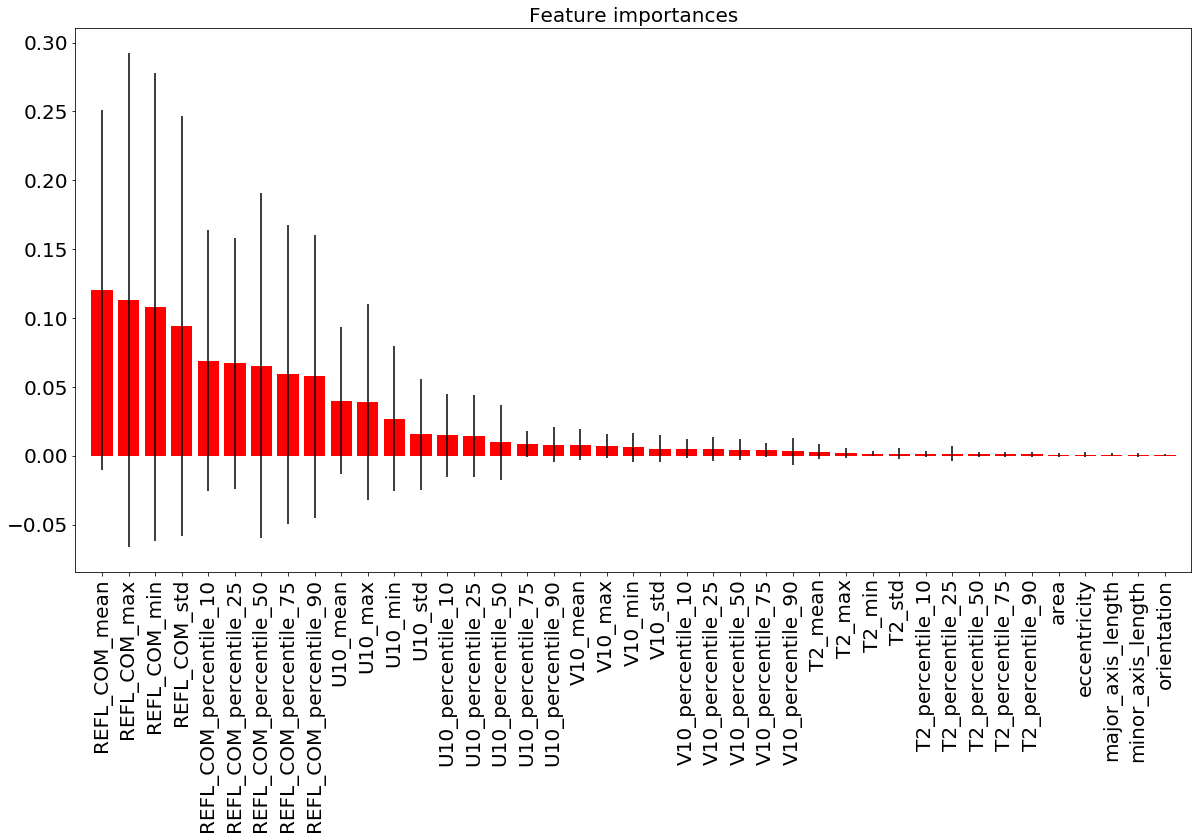

In [27]:
classifier = random_forest_model_object 
importances = classifier.feature_importances_
std = numpy.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = numpy.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(training_predictor_table.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, list(training_predictor_table_denorm)[f], importances[indices[f]]))

# Plot the feature importances of the forest
pyplot.figure(figsize=(20, 10))
pyplot.title("Feature importances")
pyplot.bar(range(training_predictor_table.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
pyplot.xticks(range(training_predictor_table.shape[1]), list(training_predictor_table_denorm), rotation=90)
pyplot.xlim([-1, training_predictor_table.shape[1]])
pyplot.show()